# *Synopsis: Capstone Project - AUTOMATIC TICKET ASSIGNMENT (NLP)*

Firstly, Thanks to our mentor and study materials which has help
ed us to understand and learn insight of basic python coding, Exploratory Data Analysis(EDA), Text data pre-processing technique, Machine learning algorithms, Neural Network and Sequential Models. 

**This Project scope covers deliverables as under,**  

1) *Understanding of data types* and exploration of attributes interms of shape, size, missing values and unique values variables. Descriptive statistics of attributes and distribution pattern. Loading of dataset, converting data types to workable datatypes. 

2) *Univariate Analysis*: Identification of unique groups, callers and input language type contribution with respect to total dataset. Identification of outliers.

3) *Bi-variate Analysis*: Bi-variate analysis between the predictor variable and between the predictor variable and target variable. Inference on relationship study. Stratergies to address data popullation, outliers and missing values.

4) *Text Pre-processing*: 
 
Text preprocessing includes, Converting characters to lower case, removal of hyperlinks,removal of Web link, removal of mail Id, expand text, removal of all the special characters and digits, removal of single characters, removal of extra spaces, Removal of stop words and tokenization of words

5) Exploration of count based machine learning models, like Multinomial Naive Base, Decision tree, Random forest and others for attributes 'Short Description' and 'Description' separately. 

6) Exploration of basic sequential models

**Dataset Understanding:**

To execute the above mentioned delivarables dataset is processed at multiple level the details of dataset with dataset name and its type of processing as under,

Dataset name&emsp;&emsp;&emsp;    Type of processing

df :&emsp;&emsp;&emsp;               _Originally provided dataset for study_

df1:&emsp;&emsp;&emsp;              _Removed outliers from dataset based on uni-variate and bi-variate analysis outcomes_  

df2:&emsp;&emsp;&emsp;              _Text preprocessing interms of removing impurity of text_

df3:&emsp;&emsp;&emsp;              _Word level, Single gram & Bi-gram analysis_

df4:&emsp;&emsp;&emsp;              _All the steps till df3 with onnly 'Description' attributes_

df5:&emsp;&emsp;&emsp;              _All the steps till df3 with onnly 'Short Description' attributes_


**Note:**

During Data Analysis it was observed that there are ticket information in non-English language like German, Spanish etc. Hence 3 new columns have been added to dataset for better data understanding, cleansing &  processing.

* **Cat_Short_Description** : Language used in Short Description column - English, German, Spanish, Other
* **Cat_Description** &emsp;&emsp;&emsp;: Language used in Description column - English, German, Spanish, Other
* **Final Category** &emsp;&emsp;&emsp;&nbsp; : This is derived from above two columns. Only if both the above columns are English the Final Category is English else it is the other Non-English language

##### Mount google drive to access required project files

In [200]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
#To change the current directory
import os
os.chdir('/content/drive/My Drive/Capstone Project')

#To validate the current path 
path = os.getcwd()
print(path)

/content/drive/My Drive/Capstone Project


In [0]:
#%pylab inline
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
#img = mpimg.imread('Business_Case.png')
#plt.figure(figsize=(20,20))
#imgplot = plt.imshow(img)
#plt.show()

In [0]:
#%pylab inline
#import matplotlib.pyplot as plt
#img = mpimg.imread('Process_Flow.png')
#plt.figure(figsize=(20,20))
#imgplot = plt.imshow(img)
#plt.show()

In [204]:
!pip install contractions

### Importing Important Libraries

In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import nltk
import re
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
import matplotlib
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
import re

### Extract Dataset

In [0]:
df = pd.read_excel('Input_Data_Final.xlsx',encoding='latin-1') #to be deleted

In [0]:
df = pd.read_excel('Input_Data_Final.xlsx')

In [0]:
# convert dataset to CSV format
df.to_csv('Input_Data_Final.csv')

In [0]:
#Read the csv converted dataset
df = pd.read_csv('Input_Data_Final.csv',encoding='latin-1') 
#encoding as latin-1 is used since the input data has text in many non-english languages
df.drop('Unnamed: 0',inplace=True,axis=1)

### Data Exploration

In [211]:
df.head() #check the top 5 records

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,English,English,English
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,English,English,English
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,English,English,English
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,English,English,English
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English


In [212]:
df.tail() #check the bottom 5 records

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,English,English,English
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,English,English,English
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,English,English,English
8498,machine nÃÂ£o estÃÂ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,Spanish,English,English
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,German,German,German


In [213]:
print('Dataset shape :', df.shape)
print('Dataset size  :',df.size)
print(df.info())

Dataset shape : (8500, 7)
Dataset size  : 59500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 7 columns):
Short description        8492 non-null object
Description              8499 non-null object
Caller                   8500 non-null object
Assignment group         8500 non-null object
Cat_Short_Description    8500 non-null object
Cat_Description          8500 non-null object
Final Category           8500 non-null object
dtypes: object(7)
memory usage: 465.0+ KB
None


In [214]:
df.describe()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
count,8492,8499,8500,8500,8500,8500,8500
unique,7481,7817,2950,74,5,4,4
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0,English,English,English
freq,38,56,810,3976,8019,7986,7985


#### Identify null Value in input dataset

*From the below graph we can infer that less than 0.1% data has null values. Short Description has comparitively more null values than Description column*

These input records will be handled during data cleansing process

In [0]:
null_value = (df.isna().sum()/df.count().round(2))*100

In [216]:
df.isna().sum()

Short description        8
Description              1
Caller                   0
Assignment group         0
Cat_Short_Description    0
Cat_Description          0
Final Category           0
dtype: int64

Text(0.5, 0, 'Table Features')

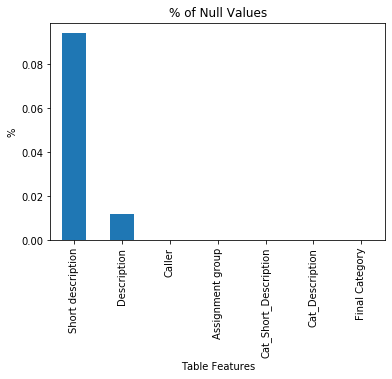

In [217]:
null_value.plot(kind='bar')
plt.title('% of Null Values')
plt.ylabel('%')
plt.xlabel('Table Features')

### <font color= 'blue'> Uni-variate Analysis</font>

**1.  Assignment Group** - Various Functional Groups handling different category of incidents

From below we have derived that there are total 74 Unique Groups
* And from the below statistics we can observe that the dataset is not normally distributed. Almost 50% of the tickets are assigned to GROUP_0. Hence we can expect better prediction for Group_0 incident tickets when compared with other groups*

In [218]:
unique_group = df['Assignment group'].unique()
print('Unique Groups count: ',len(unique_group))
print('Unique Groups for assignment\n',unique_group)

Unique Groups count:  74
Unique Groups for assignment
 ['GRP_0' 'GRP_1' 'GRP_3' 'GRP_4' 'GRP_5' 'GRP_6' 'GRP_7' 'GRP_8' 'GRP_9'
 'GRP_10' 'GRP_11' 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_15' 'GRP_16' 'GRP_17'
 'GRP_18' 'GRP_19' 'GRP_2' 'GRP_20' 'GRP_21' 'GRP_22' 'GRP_23' 'GRP_24'
 'GRP_25' 'GRP_26' 'GRP_27' 'GRP_28' 'GRP_29' 'GRP_30' 'GRP_31' 'GRP_33'
 'GRP_34' 'GRP_35' 'GRP_36' 'GRP_37' 'GRP_38' 'GRP_39' 'GRP_40' 'GRP_41'
 'GRP_42' 'GRP_43' 'GRP_44' 'GRP_45' 'GRP_46' 'GRP_47' 'GRP_48' 'GRP_49'
 'GRP_50' 'GRP_51' 'GRP_52' 'GRP_53' 'GRP_54' 'GRP_55' 'GRP_56' 'GRP_57'
 'GRP_58' 'GRP_59' 'GRP_60' 'GRP_61' 'GRP_32' 'GRP_62' 'GRP_63' 'GRP_64'
 'GRP_65' 'GRP_66' 'GRP_67' 'GRP_68' 'GRP_69' 'GRP_70' 'GRP_71' 'GRP_72'
 'GRP_73']


In [219]:
unique_lang_category = df['Final Category'].unique()
print('Language detected in dataset',unique_lang_category)

Language detected in dataset ['English' 'German' 'Other' 'Spanish']


In [0]:
group_freq = df.groupby(df['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
group_freq = pd.DataFrame(group_freq)

In [221]:
#Ticket count for each group
group_freq 

,Assignment group
Assignment group,
GRP_0,3976
GRP_8,661
GRP_24,289
GRP_12,257
GRP_9,252
...,...
GRP_67,1
GRP_61,1
GRP_73,1


In [0]:
#getting cumulative distribution of tickets
group_freq["cumpercentage"] = group_freq["Assignment group"].cumsum()/group_freq["Assignment group"].sum()*100

In [0]:
from matplotlib.ticker import PercentFormatter

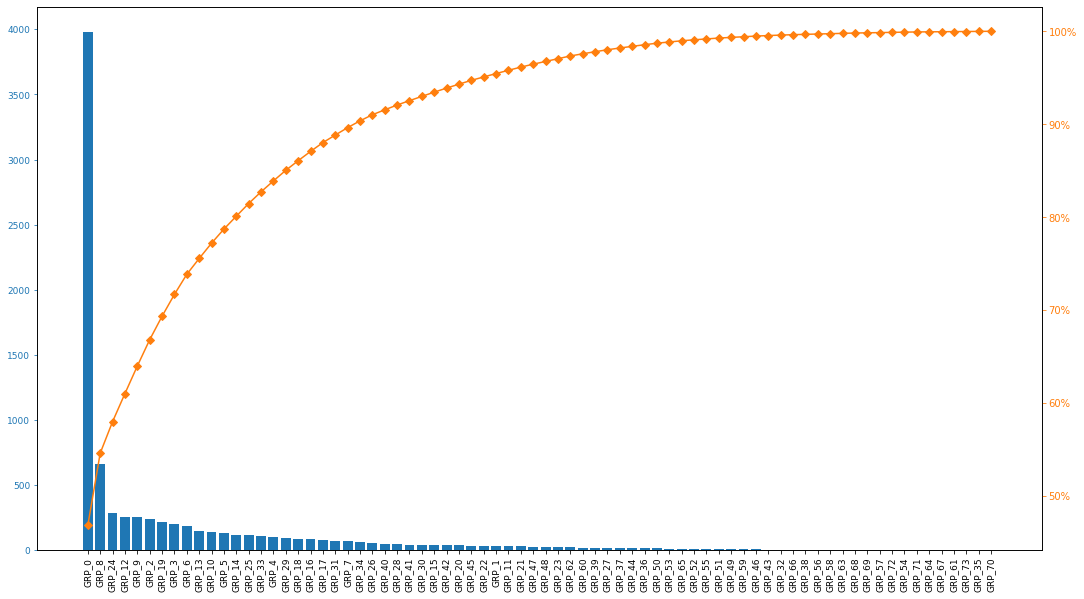

In [224]:
fig, ax = plt.subplots(figsize=(18,10))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=9)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(group_freq.index, group_freq["Assignment group"], color="C0")
ax2 = ax.twinx()
ax2.plot(group_freq.index, group_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

**2. Cat_Short_Description -** Language used in Short Description column - English, German, Spanish, Other

* From below analysis we can observe that almost more than 94% of Short Description record has incident ticket in English Language

In [225]:
sd_cat_freq_lang = df.groupby(df['Cat_Short_Description'])['Cat_Short_Description'].count().sort_values(ascending=False)
sd_cat_freq_lang = pd.DataFrame(sd_cat_freq_lang)

sd_cat_freq_lang['percentage of rec'] = sd_cat_freq_lang/df['Cat_Short_Description'].count()
sd_cat_freq_lang

,Cat_Short_Description,percentage of rec
Cat_Short_Description,,
English,8019,0.943412
German,415,0.048824
Other,53,0.006235
Spanish,12,0.001412
Null,1,0.000118


**3. Cat_Description -** Language used in Description column - English, German, Spanish, Other

* From below analysis we can observe that almost more than 94% of Description record has incident ticket in English Language

In [226]:
d_cat_freq_lang = df.groupby(df['Cat_Description'])['Cat_Description'].count().sort_values(ascending=False)
d_cat_freq_lang = pd.DataFrame(d_cat_freq_lang)
d_cat_freq_lang['percentage of rec'] = d_cat_freq_lang/df['Cat_Description'].count()
d_cat_freq_lang

,Cat_Description,percentage of rec
Cat_Description,,
English,7986,0.939529
German,450,0.052941
Other,53,0.006235
Spanish,11,0.001294


**4. Final Category -** This is derived from above two columns. 
Only if both the above columns are English the Final Category is English else it is the other Non-English language

* From below analysis we can observe that almost more than 94% of Final Category record has incident ticket in English Language

In [227]:
unique_lang_category = df['Final Category'].unique()
print('Language detected in dataset',unique_lang_category)

Language detected in dataset ['English' 'German' 'Other' 'Spanish']


In [228]:
final_cat_freq_lang = df.groupby(df['Final Category'])['Final Category'].count().sort_values(ascending=False)
final_cat_freq_lang = pd.DataFrame(final_cat_freq_lang)
final_cat_freq_lang['percentage of rec'] = final_cat_freq_lang/df['Final Category'].count()
final_cat_freq_lang

,Final Category,percentage of rec
Final Category,,
English,7985,0.939412
German,451,0.053059
Other,53,0.006235
Spanish,11,0.001294


In [0]:
final_cat_freq_lang["cumpercentage"] = final_cat_freq_lang["Final Category"].cumsum()/final_cat_freq_lang["Final Category"].sum()*100

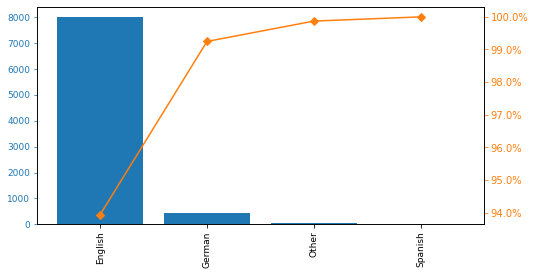

In [230]:
fig, ax = plt.subplots(figsize=(8,4))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=9)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(final_cat_freq_lang.index, final_cat_freq_lang["Final Category"], color="C0")
ax2 = ax.twinx()
ax2.plot(final_cat_freq_lang.index, final_cat_freq_lang["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

**5. Caller -** Callers/Users raising the incident tickets

*From the below statistics we can observe that Caller "bpctwhsn kzqsbmtp" has raised majority of the tickets and out of 2950 unique callers top 1500 callers have contributed to more than 80% of the tickets registration*

In [231]:
print('Total Caller rec       :',len(df['Caller']))
print('Total unique Caller rec:',len(set(df['Caller'])))

Total Caller rec       : 8500
Total unique Caller rec: 2950


In [232]:
a = df['Caller'].unique()
#a = pd.DataFrame(a)
print("Unique Callers :",len(a))

Unique Callers : 2950


In [0]:
caller_freq = df.groupby(df['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)

In [234]:
caller_freq.head(1500)

,Caller,cumpercentage
Caller,,
bpctwhsn kzqsbmtp,810,9.53
ZkBogxib QsEJzdZO,151,11.31
fumkcsji sarmtlhy,134,12.88
rbozivdq gmlhrtvp,87,13.91
rkupnshb gsmzfojw,71,14.74
...,...,...
wohzmlib fxwjhapo,1,82.89
woxrljif qymrszdk,1,82.91
wogicpdt jbdyzmhf,1,82.92


**6. Short Description -** a short description for the raised incident ticket provided the user

In [235]:
print('Total Short Description rec       :',len(df['Short description']))
print('Total unique Short Description rec:',len(set(df['Short description'])))

Total Short Description rec       : 8500
Total unique Short Description rec: 7482


**7. Description -** a detailed description for the raised incident ticket provided the user

In [236]:
print('Total Description rec       :',len(df['Description']))
print('Total unique Description rec:',len(set(df['Description'])))

Total Description rec       : 8500
Total unique Description rec: 7818


## <font color = 'blue'> Inference : EDA Part I - (Uni-Variate Analysis): </font>

1) Dataset contains total 8500 rows, attributes 'Short description' and 'Description' contains null values. Dataset contains total 7 coumns all has datatype as object.

2) There are total 74 unique groups(dependent attributes), 2950 unique callers and 4 unique languages into dataset.

3) There are less than 0.1% of null values(null input) into entire dataset. 

4) 'Assignment group' - GRP_0 contribute 46% of values into target attributes. It is indication that GRP_0 handles 46% of input tickets. Secondly, Contribution of many other Assignment group are less than 1%. 

*Imbalace of target group observed and suggested to discussed with clients and request for futher data collection on other 'Assignment group', which will help to improve the accuracy level at group level while model building. There is high probability of getting low accuracy rate with provided dataset for those groups having very limited data point to train the model.* 

5) 95% of input language identified as an English into dataset. As other languate contribution is less than 8 to 10%, other input language considered as an outlier and such data points are removed from dataset for futher study and model building. 

6) Only Caller: 'bpctwhsn kzqsbmtp' generates 10% of the total input tickets. It is indication of higher amount of multiple issues with single caller. There is not significant amount of contribution into total input tickets identified with all other callers. 


### Bi-Variate Analysis

#####  1. Assignment Group & Final Category (All Languages)

In [0]:
grp_lang = pd.crosstab(df['Assignment group'],df['Final Category'],normalize='index').round(5)*100

In [238]:
grp_lang

Final Category,English,German,Other,Spanish
Assignment group,,,,
GRP_0,97.309,2.666,0.000,0.025
GRP_1,100.000,0.000,0.000,0.000
GRP_10,97.143,2.857,0.000,0.000
GRP_11,96.667,3.333,0.000,0.000
GRP_12,89.883,9.728,0.389,0.000
...,...,...,...,...
GRP_71,100.000,0.000,0.000,0.000
GRP_72,100.000,0.000,0.000,0.000
GRP_73,100.000,0.000,0.000,0.000


##### 2. Assignment Group & Language Category  : 

From below graphs we can infer that :
* Assignement groups - GRP_24, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 contains more than 25% of non english input text(German, Spanish and Others)
* GRP_42 receives highest amount(greater than 40%)of non english input text (Other languages)
* Rest other Assigment group has very few(less than 1%) or null amount of non english input text(Other languages)
* GRP_24 contributes 3% of total dataset, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 contributes less than or equal to 1% of total dataset.

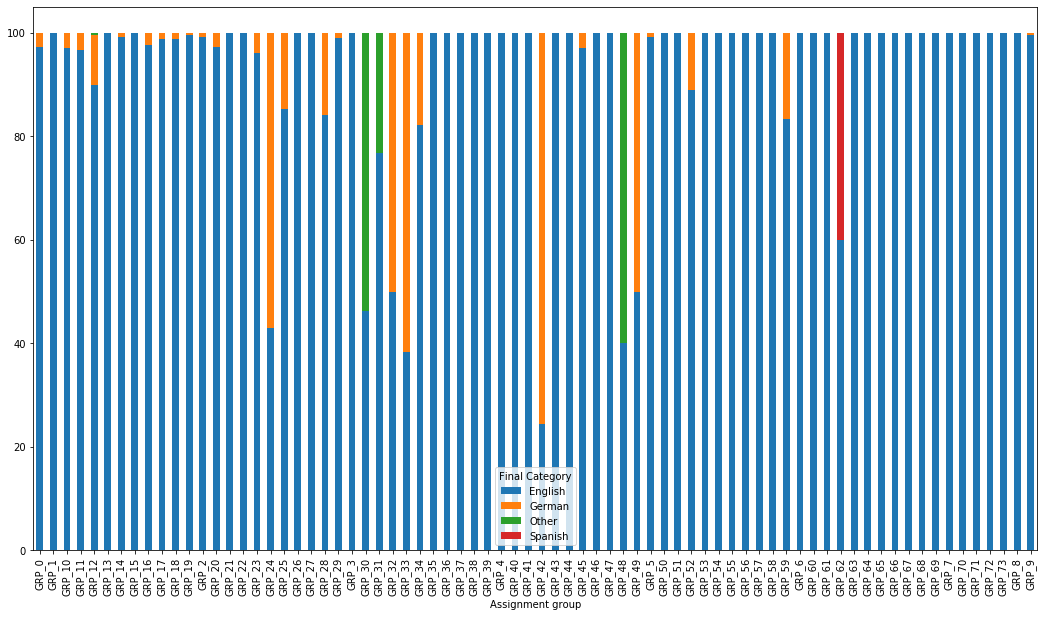

In [239]:
grp_lang.plot(kind='bar',stacked='True',figsize=(18,10))

In [0]:
group_freq["%_contri"] = group_freq["Assignment group"]/group_freq["Assignment group"].sum()*100

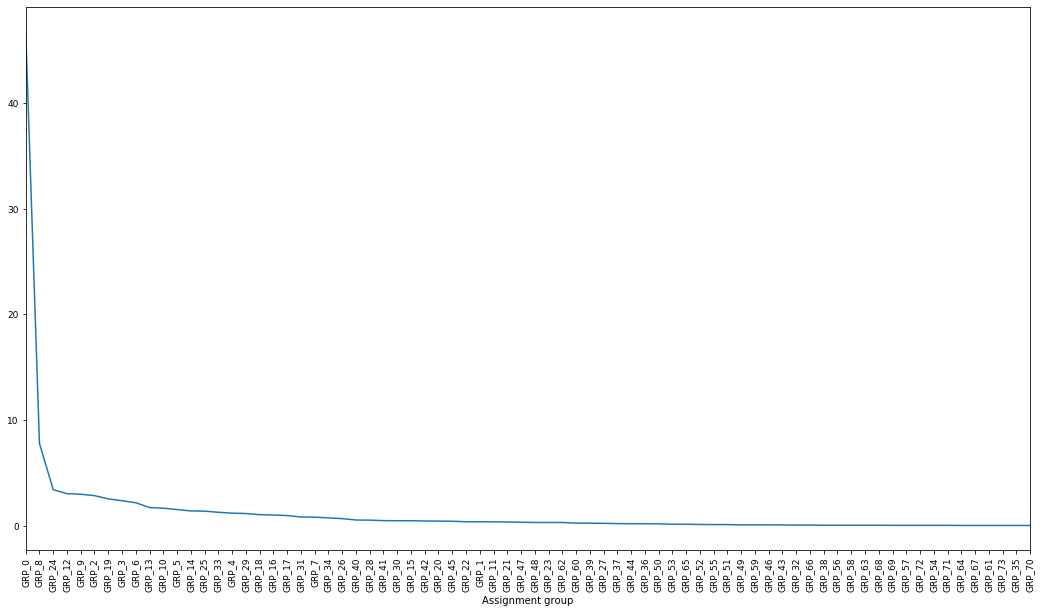

In [241]:
plt.xticks(range(0, 74))
group_freq["%_contri"].plot(kind='line',figsize=(18,10))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=9)

##### 3. Caller & Final Category (Language = German)

In [0]:
a = df[df['Final Category']== 'German']  

In [243]:
caller_freq = a.groupby(a['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)
caller_freq

,Caller,cumpercentage
Caller,,
jionmpsf wnkpzcmv,16,3.55
vzqomdgt jwoqbuml,12,6.21
niptbwdq csenjruz,12,8.87
wrcktgbd wzrgyunp,8,10.64
xwirzvda okhyipgr,6,11.97
...,...,...
plfwoagd chtpiazu,1,99.11
pjrcbhln qznblemc,1,99.33
phedsjct lyphanue,1,99.56


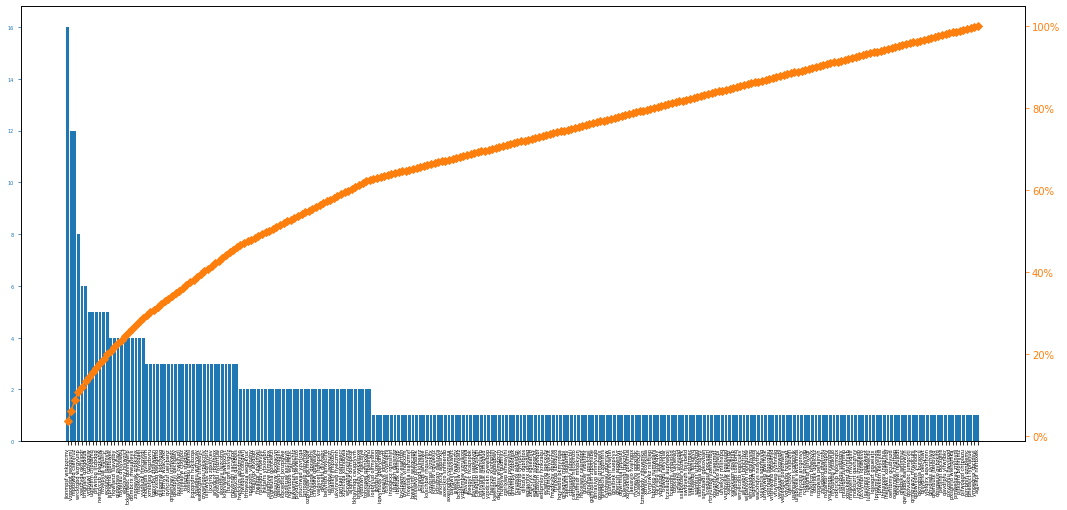

In [244]:
fig, ax = plt.subplots(figsize=(18,8))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=5)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(caller_freq.index, caller_freq["Caller"], color="C0")
ax2 = ax.twinx()
ax2.plot(caller_freq.index, caller_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

*From the above graph we can infer that there is no specific caller that responds/initiate tickets in German Language*

##### 4. Assignment Group & Final Category (Language = German)

We can obserbe from below statistics that GRP_24 contributes almost more than 36% of tickets(in German language). However it is less than 2% of the total dataset

In [245]:
caller_freq = a.groupby(a['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Assignment group"].cumsum()/caller_freq["Assignment group"].sum()*100).round(2)
caller_freq

,Assignment group,cumpercentage
Assignment group,,
GRP_24,165,36.59
GRP_0,106,60.09
GRP_33,66,74.72
GRP_42,28,80.93
GRP_12,25,86.47
GRP_25,17,90.24
GRP_34,11,92.68
GRP_28,7,94.24
GRP_10,4,95.12


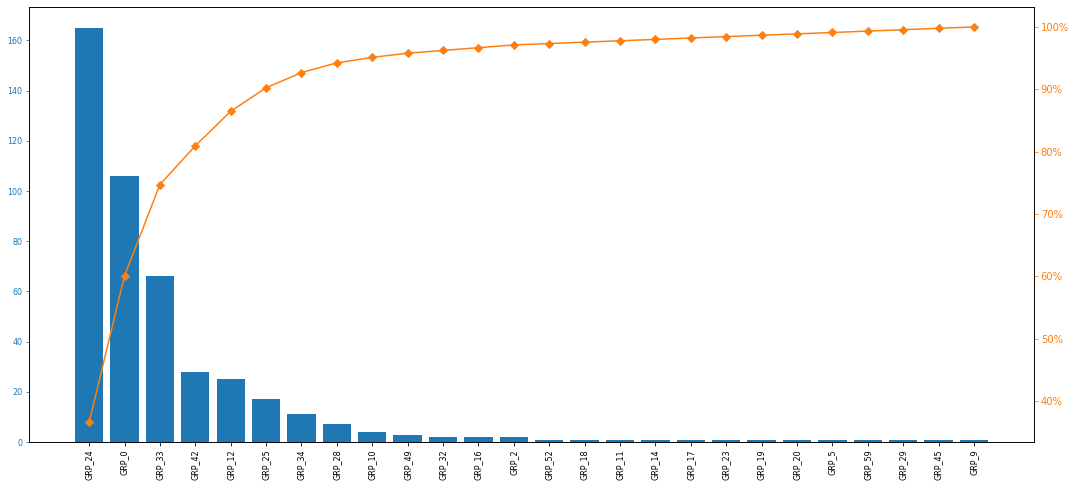

In [246]:
fig, ax = plt.subplots(figsize=(18,8))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=8)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(caller_freq.index, caller_freq["Assignment group"], color="C0")
ax2 = ax.twinx()
ax2.plot(caller_freq.index, caller_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

#### 5. Caller & Final Category (Language = Other)

*From below stats we can infer that there is no specific caller that responds/initiate tickets in Other Languages*

In [0]:
b = df[df['Final Category']== 'Other']

In [248]:
caller_freq = b.groupby(b['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)
caller_freq

,Caller,cumpercentage
Caller,,
agyvbnwz mxsonkdc,3,5.66
kyagjxdh dmtjpbnz,3,11.32
xqyjztnm onfusvlz,2,15.09
hlrmufzx qcdzierm,2,18.87
zhpwcdea cboefuis,1,20.75
hbvwqine eakqyovu,1,22.64
kwpzbxvf cvuhoizx,1,24.53
ktghvuwr uwtakcmj,1,26.42
kclhqspo xvugztyc,1,28.30


#### 6. Assignment Group & Final Category (Language = Other)
*We can obserbe from below statistics that GRP_30 contributes almost more than 39% of tickets(in Other languages). However it is less than 1% of the total dataset*

In [249]:
caller_freq = b.groupby(b['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Assignment group"].cumsum()/caller_freq["Assignment group"].sum()*100).round(2)
caller_freq

,Assignment group,cumpercentage
Assignment group,,
GRP_30,21,39.62
GRP_31,16,69.81
GRP_48,15,98.11
GRP_12,1,100.00


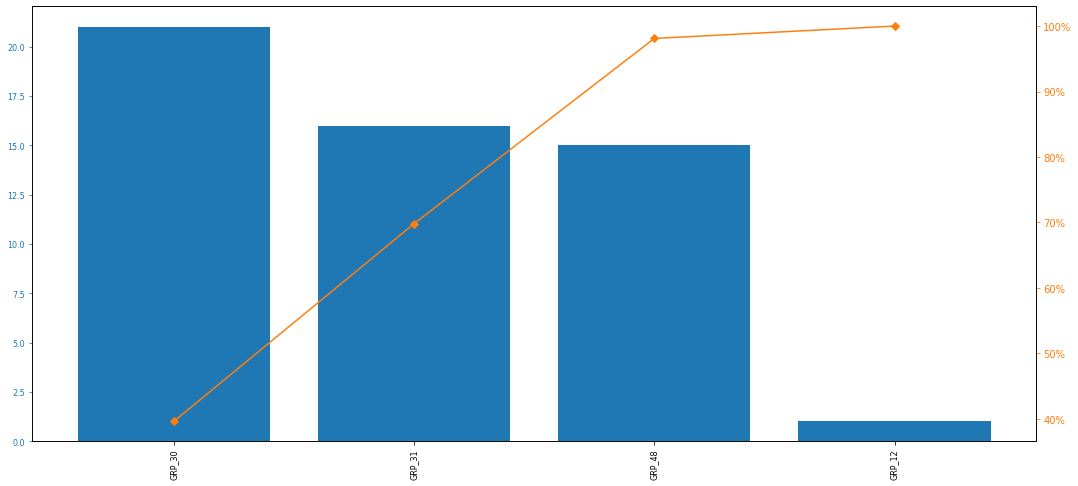

In [250]:
import matplotlib
fig, ax = plt.subplots(figsize=(18,8))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=8)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(caller_freq.index, caller_freq["Assignment group"], color="C0")
ax2 = ax.twinx()
ax2.plot(caller_freq.index, caller_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [0]:
df['Description'] = df['Description'].astype(str)
df['Short description'] = df['Short description'].astype(str)
df['Caller'] = df['Caller'].astype(str)

In [0]:
df1 = df.copy(deep=True)        # taking dataset backup before performing cleansing

In [253]:
df1.shape

(8500, 7)

## <font color = 'blue'> Inference : EDA Part II - (Bi-Variate Analysis): </font>

1) Input language Vs Assignment group study: Assignement groups - GRP_24, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 contains more than 25% of non english input text(other languages like German, Spanish and Other)

2) GRP_42 receives highest amount(greater than 40%)of non english input text (Other languages)

3) Rest other Assigment group has very few(less than 1%) or null amount of non english input text(Other languages)

4) GRP_24 contributes 3% of total dataset, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 contributes less than or equal to 1% of total dataset. 

5) Input language Vs Caller: There is no significant caller specific contribution into providing non english input text (other languages like German, Spanish, Other)

6) Input language Vs Assignment group: There is no significant Assignment group specific contribution into providing German, Spanish and Other as an input into dataset. 


Based on all the above findings, 
As contribution of all these groups GRP_24, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 are not more than 6% to total dataset. Additionally, there is no significant relationship with caller and input language texts. All non-english input texts considered as outliers and removed for futher study and model building. 

7) Right skewed distribution observed for number of word count for attribute 'Description' & 'Short Description', reflected with difference between mean and median values of number of word count. It is indication of number of sentence having higher amout of number of word counts into dataset. No of word count shall be explored while building sequential model building.  

## Data Cleansing

In [254]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [255]:
print('Dataset shape_Before removal of non-englished row :',df1.shape)

Dataset shape_Before removal of non-englished row : (8500, 7)


#### Dropping records with non-English input Short Description/Description

In [0]:
df1.drop(df1[df1['Final Category'] != 'English'].index, inplace = True)

In [257]:
print('Dataset shape_After removal of non-englished row :',df1.shape)

Dataset shape_After removal of non-englished row : (7985, 7)


In [258]:
print('Dataset shape :', df1.shape)
print('Dataset size  :',df1.size)
print(df1.info())

Dataset shape : (7985, 7)
Dataset size  : 55895
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7985 entries, 0 to 8498
Data columns (total 7 columns):
Short description        7985 non-null object
Description              7985 non-null object
Caller                   7985 non-null object
Assignment group         7985 non-null object
Cat_Short_Description    7985 non-null object
Cat_Description          7985 non-null object
Final Category           7985 non-null object
dtypes: object(7)
memory usage: 499.1+ KB
None


#### Word Counts before performing Data Cleansing

In [259]:
df1['Description_len'] = df1['Description'].astype(str).apply(len)
df1['Short_Dec_len'] = df1['Short description'].astype(str).apply(len)

df1['Des_wrd_cnt'] = df1['Description'].apply(lambda x: len(str(x).split()))
df1['Short_Des_wrd_cnt'] = df1['Short description'].apply(lambda x: len(str(x).split()))

df1.head()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category,Description_len,Short_Dec_len,Des_wrd_cnt,Short_Des_wrd_cnt
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,English,English,English,206,11,33,2
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,English,English,English,194,7,25,1
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,English,English,English,87,18,11,5
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,English,English,English,29,29,5,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English,12,12,2,2


In [260]:
print(df1['Des_wrd_cnt'].describe().round(2))
print('90th Percentile :',np.percentile(df1['Des_wrd_cnt'],90).round(2))
print('95th Percentile :',np.percentile(df1['Des_wrd_cnt'],95).round(2))

count    7985.00
mean       27.69
std        66.40
min         0.00
25%         6.00
50%        11.00
75%        29.00
max      1625.00
Name: Des_wrd_cnt, dtype: float64
90th Percentile : 58.0
95th Percentile : 97.0


In [261]:
print(df1['Short_Des_wrd_cnt'].describe().round(2))
print('90th Percentile :',np.percentile(df1['Short_Des_wrd_cnt'],90).round(2))
print('95th Percentile :',np.percentile(df1['Short_Des_wrd_cnt'],95).round(2))

count    7985.00
mean        7.00
std         4.15
min         1.00
25%         4.00
50%         6.00
75%         9.00
max        28.00
Name: Short_Des_wrd_cnt, dtype: float64
90th Percentile : 13.0
95th Percentile : 16.0


In [262]:
print(df1['Description_len'].describe().round(2))
print('90th Percentile :',np.percentile(df1['Description_len'],90).round(2))
print('95th Percentile :',np.percentile(df1['Description_len'],95).round(2))

count     7985.00
mean       207.80
std        532.36
min          1.00
25%         41.00
50%        106.00
75%        206.00
max      13001.00
Name: Description_len, dtype: float64
90th Percentile : 399.0
95th Percentile : 686.4


In [263]:
print(df1['Short_Dec_len'].describe().round(2))
print('90th Percentile :',np.percentile(df1['Short_Dec_len'],90).round(2))
print('95th Percentile :',np.percentile(df1['Short_Dec_len'],95).round(2))

count    7985.00
mean       47.56
std        27.71
min         1.00
25%        26.00
50%        41.00
75%        63.00
max       196.00
Name: Short_Dec_len, dtype: float64
90th Percentile : 85.0
95th Percentile : 104.0


In [0]:
df2 = df1.copy(deep = 'True') #Used for preprocessing of text

In [0]:
df2.drop(['Description_len','Short_Dec_len','Des_wrd_cnt','Short_Des_wrd_cnt'],axis=1,inplace=True)

In [0]:
df2['Description'] = df2['Description'].astype(str)
df2['Short description'] = df2['Short description'].astype(str)
df2['Caller'] = df2['Caller'].astype(str)

In [267]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7985 entries, 0 to 8498
Data columns (total 7 columns):
Short description        7985 non-null object
Description              7985 non-null object
Caller                   7985 non-null object
Assignment group         7985 non-null object
Cat_Short_Description    7985 non-null object
Cat_Description          7985 non-null object
Final Category           7985 non-null object
dtypes: object(7)
memory usage: 499.1+ KB


In [268]:
df2['Short description'][7]  #data before cleaning

"ticket_no1550391- employment status - new non-employee [enter user's name]"

In [269]:
df2['Description'][1]       # data before claensing

'\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind '

In [0]:
#Common function for text cleaning

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(text):
    sentence     = str(text)
    sentence_low = sentence.lower()                                            #Converted to lower case
    clean        = re.compile('<.*?>')                            
    rem_hyper    = re.sub(clean, '',sentence_low)                              #Remove hyperlink  
    rem_url      = re.sub(r'http:\S+', ' ',rem_hyper)                          #Remove Web link
    rem_mail     = re.sub(r"\S*@\S*.com\s?",' ',rem_url)                       #Remove mail Id
    txt_expand   = contractions.fix(rem_mail)                                  #Expand text
    rem_special  = re.sub(r"[!';:@#$%^&*()~?<>,\.:+-=`""'\'_]",' ',txt_expand) # Removed all the special characters 
    rem_num      = re.sub(r'\d', '', rem_special)                              #Remove digit
    rem_spcl     = re.sub("([^\x00-\x7F])+"," ",rem_num)                       #Remove special Char
    rem_single   = re.sub(r"\s+[a-zA-Z]\s+", ' ',rem_spcl)                     #Remove single char
    rem_spa      = re.sub(r"\s+", ' ',rem_single)                              #Remove extra spaces
    
    tokenizer    = RegexpTokenizer(r'\w+')
    text_token   = tokenizer.tokenize(rem_spa)                                #Text tokenized  
    filter_words = [w for w in text_token if len(w) > 2 if not w in stopwords.words('english')] #Remove stop words                   
    word_lemma   = [lemmatizer.lemmatize(w) for w in filter_words]            #Word Lemmatization
    clean_text   = word_lemma
    return " ".join(clean_text)  

In [0]:
df2['Short description'] = df2['Short description'].map(lambda x:preprocess(x))
df2['Description'] = df2['Description'].map(lambda x:preprocess(x))

In [272]:
df2['Short description'][7]  # data after cleansing

'ticket employment status new non employee enter user name'

In [273]:
df2['Description'][1] # data after cleansing

'received hello team meeting skype meeting etc appearing outlook calendar somebody please advise correct kind'

In [274]:
df2.head(10)

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
0,login issue,verified user detail employee manager name che...,spxjnwir pjlcoqds,GRP_0,English,English,English
1,outlook,received hello team meeting skype meeting etc ...,hmjdrvpb komuaywn,GRP_0,English,English,English
2,log vpn,received cannot log vpn best,eylqgodm ybqkwiam,GRP_0,English,English,English
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,GRP_0,English,English,English
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English
5,unable log engineering tool skype,unable log engineering tool skype,eflahbxn ltdgrvkz,GRP_0,English,English,English
6,event critical hostname company com value moun...,event critical hostname company com value moun...,jyoqwxhz clhxsoqy,GRP_1,English,English,English
7,ticket employment status new non employee ente...,ticket employment status new non employee ente...,eqzibjhw ymebpoih,GRP_0,English,English,English
8,unable disable add in outlook,unable disable add in outlook,mdbegvct dbvichlg,GRP_0,English,English,English
9,ticket update inplant,ticket update inplant,fumkcsji sarmtlhy,GRP_0,English,English,English


In [275]:
df2.describe()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
count,7985,7985,7985,7985,7985,7985,7985
unique,5538,5970,2772,74,2,1,1
top,job job failed job scheduler,received job job failed job scheduler,bpctwhsn kzqsbmtp,GRP_0,English,English,English
freq,471,464,810,3869,7984,7985,7985


## Word level Analysis

### Word level, Uni-gram, Bi-gram Analysis

In [0]:
df3 = df2.copy(deep=True) # Word level Analysis

In [277]:
df3.head()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
0,login issue,verified user detail employee manager name che...,spxjnwir pjlcoqds,GRP_0,English,English,English
1,outlook,received hello team meeting skype meeting etc ...,hmjdrvpb komuaywn,GRP_0,English,English,English
2,log vpn,received cannot log vpn best,eylqgodm ybqkwiam,GRP_0,English,English,English
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,GRP_0,English,English,English
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English


In [278]:
df3['Description_len'] = df3['Description'].astype(str).apply(len)
df3['Short_Dec_len'] = df3['Short description'].astype(str).apply(len)

df3['Des_wrd_cnt'] = df3['Description'].apply(lambda x: len(str(x).split()))
df3['Short_Des_wrd_cnt'] = df3['Short description'].apply(lambda x: len(str(x).split()))

df3.head()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category,Description_len,Short_Dec_len,Des_wrd_cnt,Short_Des_wrd_cnt
0,login issue,verified user detail employee manager name che...,spxjnwir pjlcoqds,GRP_0,English,English,English,143,11,21,2
1,outlook,received hello team meeting skype meeting etc ...,hmjdrvpb komuaywn,GRP_0,English,English,English,108,7,15,1
2,log vpn,received cannot log vpn best,eylqgodm ybqkwiam,GRP_0,English,English,English,28,7,5,2
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,GRP_0,English,English,English,23,23,4,4
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English,11,11,2,2


In [279]:
print("After Preprocessing Text:")
print(df3.describe().round(2))

After Preprocessing Text:
       Description_len  Short_Dec_len  Des_wrd_cnt  Short_Des_wrd_cnt
count          7985.00        7985.00      7985.00            7985.00
mean            114.89          33.13        16.39               4.91
std             265.10          18.67        37.14               2.53
min               0.00           0.00         0.00               0.00
25%              30.00          21.00         4.00               3.00
50%              50.00          28.00         7.00               5.00
75%             122.00          42.00        17.00               6.00
max            5782.00         141.00       759.00              18.00


**Inference:** After pre-processing(cleansing) text it has been identified that there are input records with only special characters which has been replaced with spaces. Hence count of such null records has increased and need to be handled

In [280]:
print('90th Percentile_After Preprocessing Text_Description - Length :',np.percentile(df3['Description_len'],90).round(2))
print('90th Percentile_After Preprocessing Text_Description - word count :',np.percentile(df3['Des_wrd_cnt'],90).round(2))
print('90th Percentile_After Preprocessing Text_Short Description - Length :',np.percentile(df3['Short_Dec_len'],90).round(2))
print('90th Percentile_After Preprocessing Text_Short Description - word count :',np.percentile(df3['Short_Des_wrd_cnt'],90).round(2))

90th Percentile_After Preprocessing Text_Description - Length : 239.0
90th Percentile_After Preprocessing Text_Description - word count : 33.0
90th Percentile_After Preprocessing Text_Short Description - Length : 60.0
90th Percentile_After Preprocessing Text_Short Description - word count : 9.0


In [281]:
print("Before Preprocess Text:")
print(df1.describe().round(2))

Before Preprocess Text:
       Description_len  Short_Dec_len  Des_wrd_cnt  Short_Des_wrd_cnt
count          7985.00        7985.00      7985.00            7985.00
mean            207.80          47.56        27.69               7.00
std             532.36          27.71        66.40               4.15
min               1.00           1.00         0.00               1.00
25%              41.00          26.00         6.00               4.00
50%             106.00          41.00        11.00               6.00
75%             206.00          63.00        29.00               9.00
max           13001.00         196.00      1625.00              28.00


In [282]:
print('90th Percentile_After Preprocessing Text_Description - Length :',np.percentile(df1['Description_len'],90).round(2))
print('90th Percentile_After Preprocessing Text_Description - word count :',np.percentile(df1['Des_wrd_cnt'],90).round(2))
print('90th Percentile_After Preprocessing Text_Short Description - Length :',np.percentile(df1['Short_Dec_len'],90).round(2))
print('90th Percentile_After Preprocessing Text_Short Description - word count :',np.percentile(df1['Short_Des_wrd_cnt'],90).round(2))

90th Percentile_After Preprocessing Text_Description - Length : 399.0
90th Percentile_After Preprocessing Text_Description - word count : 58.0
90th Percentile_After Preprocessing Text_Short Description - Length : 85.0
90th Percentile_After Preprocessing Text_Short Description - word count : 13.0


In [283]:
print('Number of Null row in Attribute - Description_Length :',df3['Description_len'][df3['Description_len']==0].count())
print('Number of Null row in Attribute - Short Description_Length :',df3['Short_Dec_len'][df3['Short_Dec_len']==0].count())
print('Number of Null row in Attribute - Description_Word_Count :',df3['Des_wrd_cnt'][df3['Des_wrd_cnt']==0].count())
print('Number of Null row in Attribute - Short_Description_Word_Count :',df3['Short_Des_wrd_cnt'][df3['Short_Des_wrd_cnt']==0].count())

Number of Null row in Attribute - Description_Length : 78
Number of Null row in Attribute - Short Description_Length : 32
Number of Null row in Attribute - Description_Word_Count : 78
Number of Null row in Attribute - Short_Description_Word_Count : 32


**Inference**: There are 78 rows in attribute 'Description' and 32 rows in attribute 'Short description' has null values after pre-processing of text. 

In [0]:
df3.drop(df3[df3['Description_len'] == 0].index, inplace = True)
df3.drop(df3[df3['Short_Dec_len'] == 0].index, inplace = True)

**Inference:** Removed the null rows from attributes 'Description' and 'Short description'

In [285]:
print("After Preprocessing with Null Values Removed:")
print(df3.describe().round(2))

After Preprocessing with Null Values Removed:
       Description_len  Short_Dec_len  Des_wrd_cnt  Short_Des_wrd_cnt
count          7892.00        7892.00      7892.00            7892.00
mean            116.11          32.94        16.57               4.89
std             266.39          18.26        37.32               2.48
min               2.00           2.00         1.00               1.00
25%              31.00          21.00         4.00               3.00
50%              51.00          28.00         7.00               5.00
75%             124.00          42.00        17.00               6.00
max            5782.00         141.00       759.00              18.00


In [286]:
print('90th Percentile_After Preprocessing Text_Description - Length :',np.percentile(df3['Description_len'],90).round(2))
print('90th Percentile_After Preprocessing Text_Description - word count :',np.percentile(df3['Des_wrd_cnt'],90).round(2))
print('90th Percentile_After Preprocessing Text_Short Description - Length :',np.percentile(df3['Short_Dec_len'],90).round(2))
print('90th Percentile_After Preprocessing Text_Short Description - word count :',np.percentile(df3['Short_Des_wrd_cnt'],90).round(2))

90th Percentile_After Preprocessing Text_Description - Length : 240.0
90th Percentile_After Preprocessing Text_Description - word count : 33.0
90th Percentile_After Preprocessing Text_Short Description - Length : 58.0
90th Percentile_After Preprocessing Text_Short Description - word count : 8.0


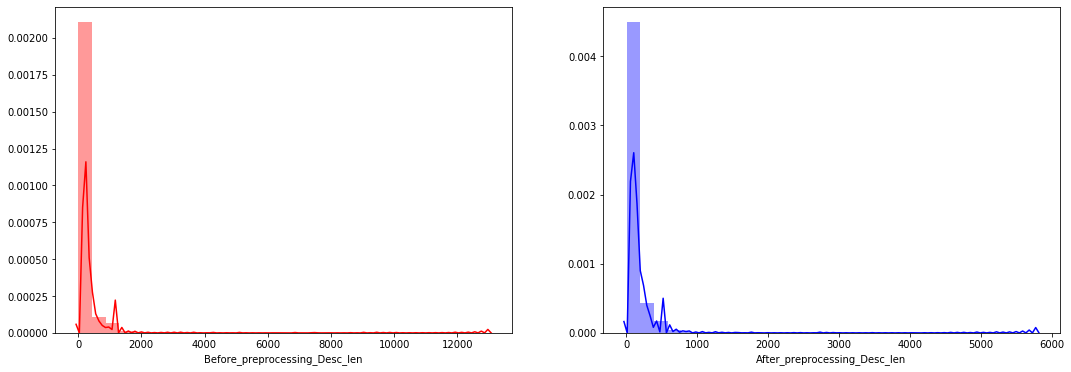

In [287]:
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,figsize=(18,6))
sns.distplot(df1['Description_len'],ax=ax1,color="red",kde=True,bins=30,axlabel="Before_preprocessing_Desc_len")
sns.distplot(df3['Description_len'],ax=ax2,color="blue",kde=True,bins=30,axlabel='After_preprocessing_Desc_len')

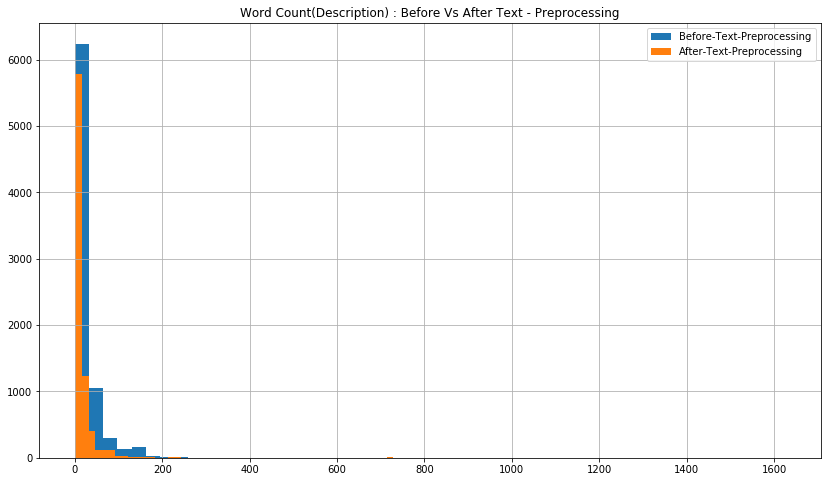

In [288]:
fig = plt.figure(figsize=(14, 8))
plt.title("Word Count(Description) : Before Vs After Text - Preprocessing")
df1['Des_wrd_cnt'].hist(bins=50,label='Before-Text-Preprocessing')
df3['Des_wrd_cnt'].hist(bins=50,label='After-Text-Preprocessing')
plt.legend(loc='best')

**Inference:** After pre-processing of text, most frequent number of words are near to 40 count across the all rows of attributes 'Description'

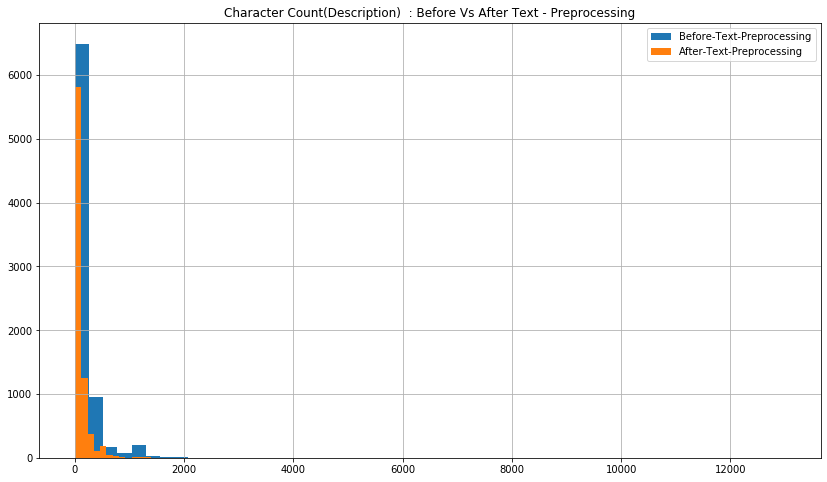

In [289]:
fig = plt.figure(figsize=(14, 8))
plt.title("Character Count(Description)  : Before Vs After Text - Preprocessing")
df1['Description_len'].hist(bins=50,label='Before-Text-Preprocessing')
df3['Description_len'].hist(bins=50,label='After-Text-Preprocessing')
plt.legend(loc='best')

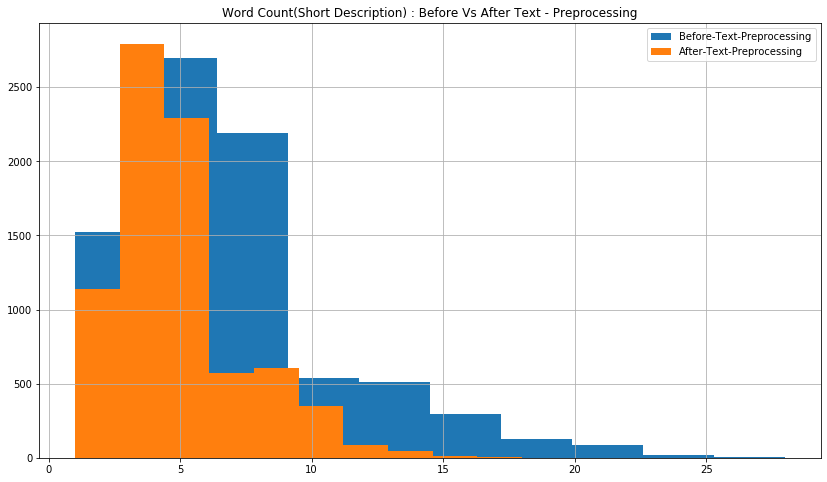

In [290]:
fig = plt.figure(figsize=(14, 8))
plt.title("Word Count(Short Description) : Before Vs After Text - Preprocessing")
df1['Short_Des_wrd_cnt'].hist(label='Before-Text-Preprocessing')
df3['Short_Des_wrd_cnt'].hist(label='After-Text-Preprocessing')
plt.legend(loc='best')

**Inference:** After pre-processing of text, most frequent number of words are near to 6 count across the all rows of attributes 'Short description'

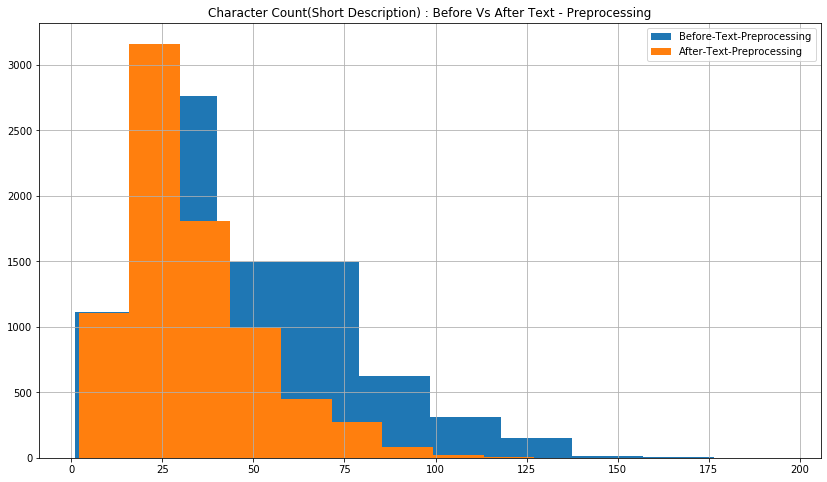

In [291]:
fig = plt.figure(figsize=(14, 8))
plt.title("Character Count(Short Description) : Before Vs After Text - Preprocessing")
df1['Short_Dec_len'].hist(label='Before-Text-Preprocessing')
df3['Short_Dec_len'].hist(label='After-Text-Preprocessing')
plt.legend(loc='best')

In [292]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df3['Description'], 20)
for word, freq in common_words:
    print(word, freq)
top_20 = pd.DataFrame(common_words, columns = ['Description' , 'count'])
top_20 = top_20.groupby('Description').sum()['count'].sort_values(ascending=True)

job 2574
received 2294
yes 2027
please 1924
password 1412
user 1399
company 1188
erp 1158
sid 1088
tool 1044
scheduler 969
issue 960
access 958
ticket 934
failed 906
reset 836
unable 784
error 777
account 752
site 707


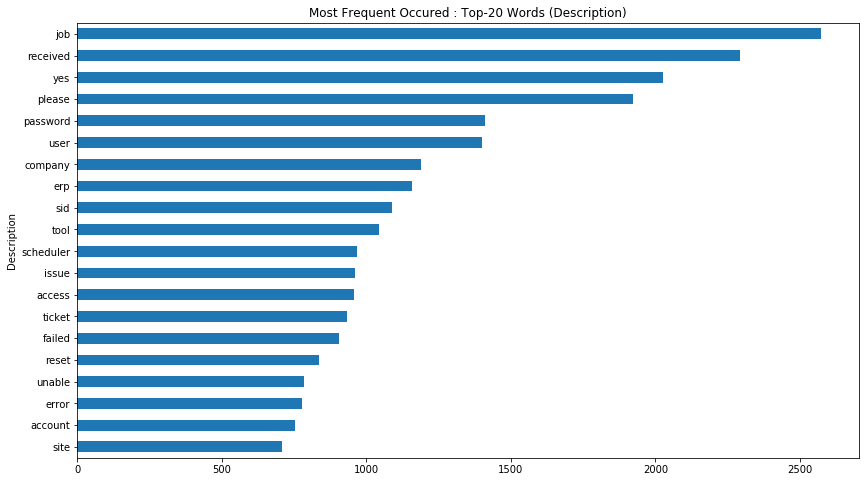

In [293]:
fig = plt.figure(figsize=(14, 8))
plt.title("Most Frequent Occured : Top-20 Words (Description)")
top_20.plot(kind='barh')

In [294]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df3['Short description'], 20)
for word, freq in common_words:
    print(word, freq)
top_20_s = pd.DataFrame(common_words, columns = ['Short description' , 'count'])
top_20_s = top_20_s.groupby('Short description').sum()['count'].sort_values(ascending=True)

job 2523
password 973
scheduler 959
erp 856
failed 828
unable 712
tool 677
sid 597
reset 571
issue 556
account 519
access 461
outlook 397
hostname 349
company 336
login 305
locked 297
working 291
user 289
error 284


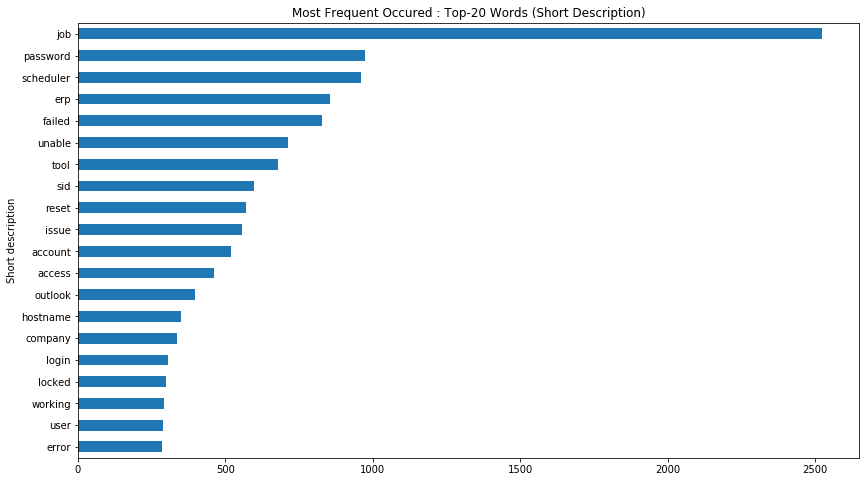

In [295]:
fig = plt.figure(figsize=(14, 8))
plt.title("Most Frequent Occured : Top-20 Words (Short Description)")
top_20_s.plot(kind='barh')

In [296]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df3['Description'], 20)
for word, freq in common_words:
    print(word, freq)
top_20_b_d = pd.DataFrame(common_words, columns = ['Description' , 'count'])
top_20_b_d = top_20_b_d.groupby('Description').sum()['count'].sort_values(ascending=True)

job scheduler 969
failed job 809
received job 786
job job 631
job failed 478
cid image 446
backup circuit 427
received hello 396
password reset 354
telecom vendor 302
erp sid 296
type outage 286
scheduled maintenance 286
yes company 285
circuit yes 285
engineering tool 252
image png 249
yes yes 234
please help 218
collaboration platform 208


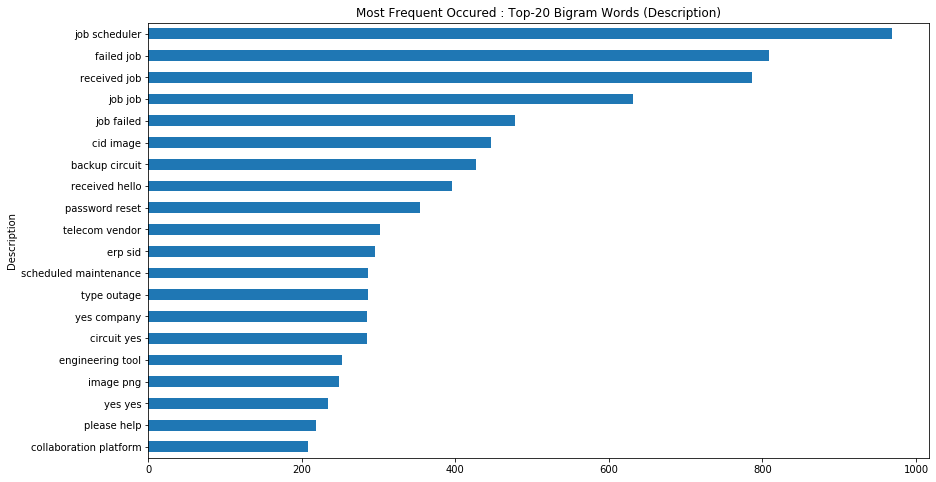

In [297]:
fig = plt.figure(figsize=(14, 8))
plt.title("Most Frequent Occured : Top-20 Bigram Words (Description)")
top_20_b_d.plot(kind='barh')

In [298]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df3['Short description'], 20)
for word, freq in common_words:
    print(word, freq)
top_20_b_sd = pd.DataFrame(common_words, columns = ['Short description' , 'count'])
top_20_b_sd = top_20_b_sd.groupby('Short description').sum()['count'].sort_values(ascending=True)

job scheduler 959
failed job 805
job job 632
job failed 474
password reset 371
erp sid 282
account locked 199
engineering tool 192
ticket update 152
abended job 148
reset password 142
collaboration platform 142
unable login 124
job sid 106
password management 105
management tool 105
sid account 101
tool password 92
update inplant 91
unable connect 91


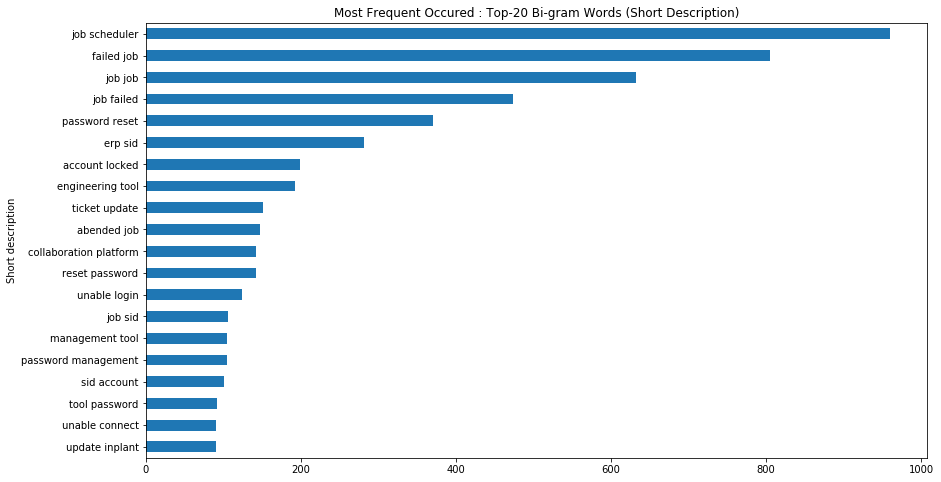

In [299]:
fig = plt.figure(figsize=(14, 8))
plt.title("Most Frequent Occured : Top-20 Bi-gram Words (Short Description)")
top_20_b_sd.plot(kind='barh')

#### Word Cloud Representation of above statistics

In [300]:
!pip install Wordcloud

In [0]:
from wordcloud import WordCloud

In [0]:
stop = stopwords.words('english')

Text(0.5, 1, 'Most Frequent Uni-gram Words - Description Attribute')

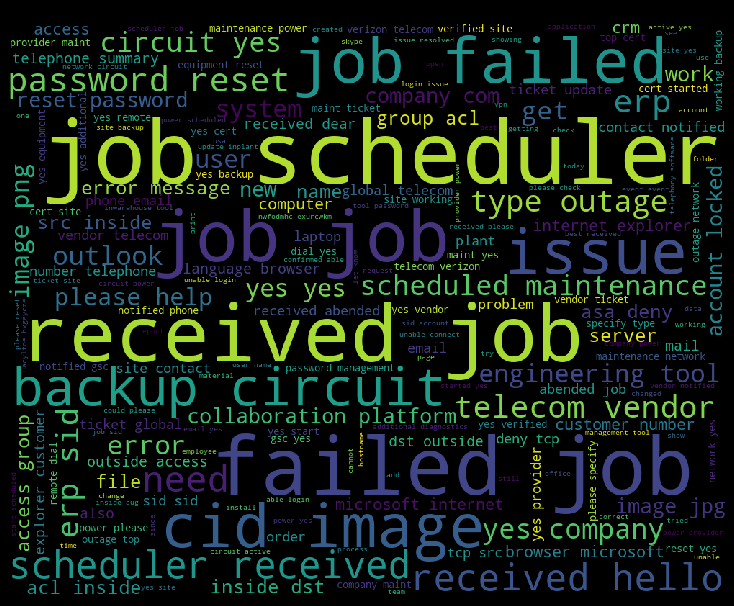

In [303]:
def wordcloud(text,stopwords,ngram=1):
    # text: if ngram>1, text should be a dictionary
    wordcloud = WordCloud(width=1000, 
                          height=800,
                          background_color='black',
                          stopwords=stop)
    if ngram ==1:
       wordc = wordcloud.generate(' '.join(text))
    else:
       wordc = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(10,8), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
wordcloud(df3.Description,stop)
plt.title("Most Frequent Uni-gram Words - Description Attribute")

Text(0.5, 1, 'Most Frequent Uni-gram Words - Short description Attribute')

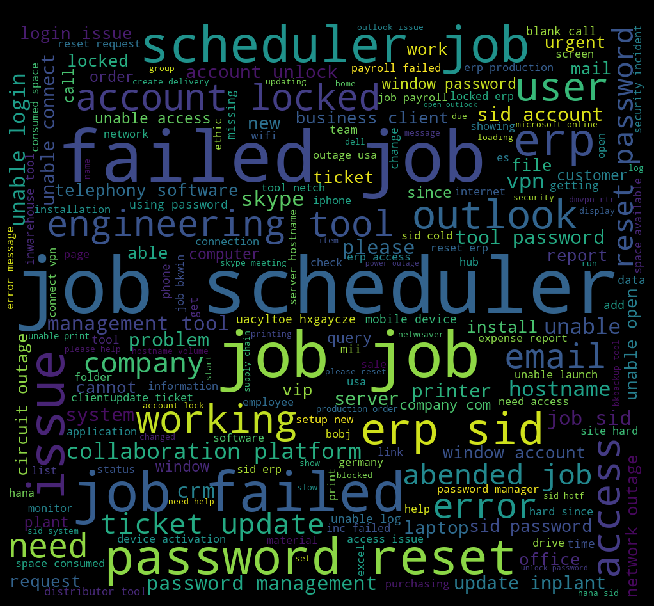

In [304]:
def wordcloud(text,stopwords,ngram=1):
    # text: if ngram>1, text should be a dictionary
    wordcloud = WordCloud(width=1000, 
                          height=900,
                          background_color='black',
                          stopwords=stop)
    if ngram ==1:
       wordc = wordcloud.generate(' '.join(text))
    else:
       wordc = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(10,8), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
wordcloud(df3['Short description'],stop)
plt.title("Most Frequent Uni-gram Words - Short description Attribute")

Text(0.5, 1, 'Most Frequent Uni-gram Words - Description Attribute with Group_0')

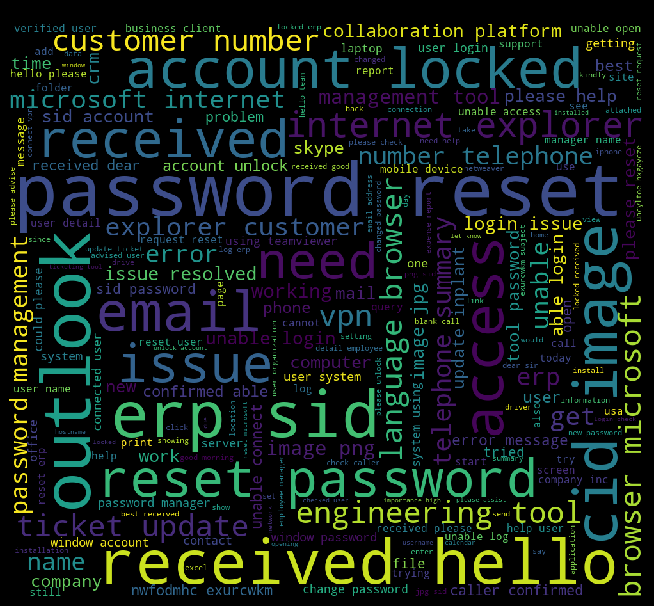

In [305]:
def wordcloud(text,stopwords,ngram=1):
    # text: if ngram>1, text should be a dictionary
    wordcloud = WordCloud(width=1000, 
                          height=900,
                          background_color='black',
                          stopwords=stop)
    if ngram ==1:
       wordc = wordcloud.generate(' '.join(text))
    else:
       wordc = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(10,8), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
wordcloud(df3.Description[df3['Assignment group']=='GRP_0'],stop)
plt.title("Most Frequent Uni-gram Words - Description Attribute with Group_0")

**Inference:** Based on above Uni-gram and bi-gram analysis we can observe that among the Top 20 words, there are more than 75% word combination are not same in 'Description' and 'Short description' attribute.

*Hence we can conclude that both the attributes are important for model building and prediction*

In [0]:
#Generating final data set to be used for further processing and model building
df3.to_csv('Input_Data_for_model.csv') 

### ** EDA ENDS **

In [0]:
df4 = df3.copy(deep=True)
df5 = df3.copy(deep=True)

In [308]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7892 entries, 0 to 8498
Data columns (total 11 columns):
Short description        7892 non-null object
Description              7892 non-null object
Caller                   7892 non-null object
Assignment group         7892 non-null object
Cat_Short_Description    7892 non-null object
Cat_Description          7892 non-null object
Final Category           7892 non-null object
Description_len          7892 non-null int64
Short_Dec_len            7892 non-null int64
Des_wrd_cnt              7892 non-null int64
Short_Des_wrd_cnt        7892 non-null int64
dtypes: int64(4), object(7)
memory usage: 739.9+ KB


In [0]:
df4.drop(['Description_len','Short_Dec_len','Des_wrd_cnt','Caller','Short_Des_wrd_cnt','Caller','Cat_Short_Description','Cat_Description','Final Category','Short description'],axis=1,inplace=True)
df5.drop(['Description_len','Short_Dec_len','Des_wrd_cnt','Caller','Short_Des_wrd_cnt','Caller','Cat_Short_Description','Cat_Description','Final Category','Description'],axis=1,inplace=True)


### Base models exploration - 
We have explored various models below  - MultinomialNB, Decision TRee, Random Forest, SVC, Bagging and Boosting.

It was observed that MultinomialNB model out performed the other model training.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
cv = CountVectorizer()
x = cv.fit_transform(df4['Description'])
y = df4['Assignment group']

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [313]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
y_pred = model.predict(x_test)

0.6979249168382702
0.6238125395820139


In [314]:
#Hyper-parameter tuning
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.1,0.3,0.5,0.7,0.9,1],'fit_prior':[True,False]}
model2 = GridSearchCV(model, param_grid=parameters, cv=10,verbose=5)
model2.fit(x_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.628, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.592, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........... alpha=0.1, fit_prior=True, score=0.657, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.610, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.620, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.629, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


[CV] ........... alpha=0.1, fit_prior=True, score=0.643, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.653, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.618, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.634, total=   0.1s
[CV] alpha=0.1, fit_prior=False ......................................
[CV] .......... alpha=0.1, fit_prior=False, score=0.560, total=   0.1s
[CV] alpha=0.1, fit_prior=False ......................................
[CV] .......... alpha=0.1, fit_prior=False, score=0.551, total=   0.1s
[CV] alpha=0.1, fit_prior=False ......................................
[CV] .......... alpha=0.1, fit_prior=False, score=0.590, total=   0.1s
[CV] alpha=0.1, fit_prior=False ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    7.9s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [315]:
print("Best Hyper Parameters:\n", model2.best_params_,model2.best_score_)

Best Hyper Parameters:
 {'alpha': 0.3, 'fit_prior': True} 0.6401106341150273


In [316]:
Best_model = MultinomialNB(alpha=0.3,fit_prior=True)
Best_model.fit(x_train,y_train)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [317]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import math
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
result_MNB = pd.Series(cross_val_score(Best_model,x_train, y_train, cv=kfold)*100)
result_MNB

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0    63.607595
1    62.816456
2    63.132911
3    63.074485
4    63.708399
5    62.916006
6    66.402536
7    65.610143
8    64.025357
9    62.282092
dtype: float64

In [318]:
print('95% of Confidence Interval(Model Based on Description): \n\tUppper Limit = {}\n\tLower Limit = {}'.format
      ((result_MNB.mean())-(1.96)*(result_MNB.std()/(math.sqrt(result_MNB.count()))), 
       (result_MNB.mean())+(1.96)*(result_MNB.std()/(math.sqrt(result_MNB.count())))                                                                             
      ))

95% of Confidence Interval(Model Based on Description): 
	Uppper Limit = 62.95338061652345
	Lower Limit = 64.56181527506916


In [319]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       GRP_0       0.66      0.98      0.79       773
       GRP_1       0.00      0.00      0.00         6
      GRP_10       0.00      0.00      0.00        24
      GRP_11       0.00      0.00      0.00         7
      GRP_12       0.42      0.47      0.44        38
      GRP_13       0.29      0.26      0.27        31
      GRP_14       1.00      0.41      0.58        22
      GRP_15       0.00      0.00      0.00         2
      GRP_16       0.00      0.00      0.00        19
      GRP_17       0.00      0.00      0.00         8
      GRP_18       0.40      0.10      0.15        21
      GRP_19       0.60      0.12      0.20        49
       GRP_2       0.52      0.23      0.32        53
      GRP_20       0.00      0.00      0.00         3
      GRP_21       0.00      0.00      0.00         6
      GRP_22       0.00      0.00      0.00         4
      GRP_23       0.00      0.00      0.00         4
      GRP_24       0.92    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
cv = CountVectorizer()
x1 = cv.fit_transform(df5['Short description'])
y1 = df5['Assignment group']

In [0]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

In [322]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(x1_train, y1_train)
print(model1.score(x1_train,y1_train))
print(model1.score(x1_test,y1_test))
y_pred = model1.predict(x1_test)

0.6944400443529225
0.6358454718176061


In [323]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.1,0.3,0.5,0.7,0.9,1],'fit_prior':[True,False],}
model3 = GridSearchCV(model1, param_grid=parameters, cv=10,verbose=5)
model3.fit(x1_train,y1_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.638, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.642, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.652, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.620, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s



[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.631, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.667, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.645, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.631, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.635, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.621, total=   0.1s
[CV] alpha=0.1, fit_prior=False ......................................
[CV] .......... alpha=0.1, fit_prior=False, score=0.551, total=   0.1s
[CV] 

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    5.7s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [324]:
print("Best Hyper Parameters:\n", model3.best_params_,model3.best_score_)

Best Hyper Parameters:
 {'alpha': 0.3, 'fit_prior': True} 0.6534100483460048


In [325]:
Best_model = MultinomialNB(alpha=0.3,fit_prior=True)
Best_model.fit(x1_train,y1_train)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [326]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import math
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
result_MNB_ = pd.Series(cross_val_score(Best_model,x1_train, y1_train, cv=kfold)*100)
result_MNB_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0    67.721519
1    63.765823
2    66.930380
3    63.232964
4    64.342314
5    64.500792
6    65.134707
7    66.719493
8    67.353407
9    60.221870
dtype: float64

In [327]:
print('95% of Confidence Interval(Model Based on Short Description): \n\tUppper Limit = {}\n\tLower Limit = {}'.format
      ((result_MNB_.mean())-(1.96)*(result_MNB_.std()/(math.sqrt(result_MNB_.count()))), 
       (result_MNB_.mean())+(1.96)*(result_MNB_.std()/(math.sqrt(result_MNB_.count())))                                                                             
      ))

95% of Confidence Interval(Model Based on Short Description): 
	Uppper Limit = 63.563875582487086
	Lower Limit = 66.4207780715481


In [328]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,y_pred))

              precision    recall  f1-score   support

       GRP_0       0.68      0.98      0.80       773
       GRP_1       0.00      0.00      0.00         6
      GRP_10       0.75      0.12      0.21        24
      GRP_11       0.00      0.00      0.00         7
      GRP_12       0.41      0.61      0.49        38
      GRP_13       0.41      0.29      0.34        31
      GRP_14       0.71      0.45      0.56        22
      GRP_15       0.00      0.00      0.00         2
      GRP_16       0.00      0.00      0.00        19
      GRP_17       0.00      0.00      0.00         8
      GRP_18       1.00      0.10      0.17        21
      GRP_19       0.43      0.12      0.19        49
       GRP_2       0.53      0.19      0.28        53
      GRP_20       0.00      0.00      0.00         3
      GRP_21       0.00      0.00      0.00         6
      GRP_22       0.00      0.00      0.00         4
      GRP_23       0.00      0.00      0.00         4
      GRP_24       0.89    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### MultinomialNB - explored with Single gram, Bi-Gram, Tri Gram

In [0]:
cv = CountVectorizer(ngram_range=(1,3))  #Single gram, Bi-Gram, Tri Gram
x2 = cv.fit_transform(df4['Description'])
y2 = df4['Assignment group']

In [0]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

In [331]:
from sklearn.naive_bayes import MultinomialNB
model_B = MultinomialNB(fit_prior=True)
model_B.fit(x2_train, y2_train)
print(model_B.score(x2_train,y2_train))
print(model_B.score(x2_test,y2_test))
y_pred = model_B.predict(x2_test)

0.8121336923808016
0.6409119696010133


In [0]:
cv = CountVectorizer(ngram_range=(1,3))
x2 = cv.fit_transform(df5['Short description'])
y2 = df5['Assignment group']

In [0]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

In [334]:
from sklearn.naive_bayes import MultinomialNB
model_B = MultinomialNB(fit_prior=True)
model_B.fit(x2_train, y2_train)
print(model_B.score(x2_train,y2_train))
print(model_B.score(x2_test,y2_test))
y_pred = model_B.predict(x2_test)

0.8012038650403929
0.6599113362887904


In [0]:
#### Sequential model exploration - in progress

In [0]:
assignment_group = pd.DataFrame(df4['Assignment group'])
group = pd.get_dummies(assignment_group,columns=['Assignment group'])

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df4['Description'], group, test_size = 0.2, random_state = 0)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
tokenizer.fit_on_texts(x_test)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [0]:
length = []
for x in x_train:
    length.append(len(x.split()))

In [340]:
max(length)

759

In [341]:
x_train_seq = pad_sequences(sequences, maxlen=33,padding='post')
print('Shape of data tensor:', x_train_seq.shape)
x_test_seq = pad_sequences(sequences_test, maxlen=33,padding='post')
print('Shape of data tensor:', x_train_seq.shape)

Shape of data tensor: (6313, 33)
Shape of data tensor: (6313, 33)


In [342]:
x_train_seq[:5]

array([[1597,  115,  760,  251,  404,   46,    8,    3,  634,  405,  299,
         107,  268,  251,  271,  107,  126,  610,   14,   88,   80,   49,
         790,   12,   26,  251,  404,  922, 1784,   57,  847,  443,   26],
       [ 538,   12,  678,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,  152,    1,    1,   11,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2, 2426, 4643,  879,  194, 1785,  761, 2427, 4644,  495,  392,
          44,  923,  297,   58,  848, 1786,   99,  209,  392,   44,  311,
         761,  879, 1156,   13, 2025, 1157,  880, 1156, 1158, 4645,    0],
       [  76,   12,  142,  172,   50,   76, 3037, 3037,   53,   18,   38,
         196,  260,   14,  352,  2

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

##### Sequential - LSTM

In [344]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(20000, embedding_vecor_length, input_length=33))
model.add(LSTM(130))
model.add(Dense(74, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=6, batch_size=64)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 33, 32)            640000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 130)               84760     
_________________________________________________________________
dense_8 (Dense)              (None, 74)                9694      
Total params: 734,454
Trainable params: 734,454
Non-trainable params: 0
_________________________________________________________________
None
Train on 6313 samples, validate on 1579 samples
Epoch 1/6
6313/6313 [==============================] - 9s 1ms/step - loss: 0.0486 - acc: 0.9865 - val_loss: 0.0442 - val_acc: 0.9865
Epoch 2/6
6313/6313 [==============================] - 7s 1ms/step - loss: 0.0444 - acc: 0.9867 - val_loss: 0.0439 - val_acc: 0.9865
Epoch 3/6
6313/6313 [==============================] - 7s 1

In [345]:
# Final evaluation of the model
scores = model.evaluate(x_test_seq, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.83%


##### Sequential - Bidirectional

In [346]:
from keras.layers import Bidirectional
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(20000, embedding_vecor_length, input_length=33))
model.add(Bidirectional(LSTM(130)))
model.add(Dense(74, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=6, batch_size=64)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 33, 32)            640000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 260)               169520    
_________________________________________________________________
dense_9 (Dense)              (None, 74)                19314     
Total params: 828,834
Trainable params: 828,834
Non-trainable params: 0
_________________________________________________________________
None
Train on 6313 samples, validate on 1579 samples
Epoch 1/6
6313/6313 [==============================] - 16s 3ms/step - loss: 0.0478 - acc: 0.9878 - val_loss: 0.0419 - val_acc: 0.9891
Epoch 2/6
6313/6313 [==============================] - 13s 2ms/step - loss: 0.0369 - acc: 0.9907 - val_loss: 0.0389 - val_acc: 0.9892
Epoch 3/6
6313/6313 [==============================] - 13

In [347]:
# Final evaluation of the model
scores = model.evaluate(x_test_seq, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.91%


In [0]:
from keras.layers import GlobalMaxPooling1D, Conv1D

In [0]:
model = Sequential()

model.add(Embedding(20000, embedding_vecor_length, input_length=33))

model.add(Conv1D(300, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(74, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [350]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 33, 32)            640000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 29, 300)           48300     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 300)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 74)                22274     
Total params: 710,574
Trainable params: 710,574
Non-trainable params: 0
_________________________________________________________________
None


In [351]:
model.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=6, batch_size=128)

Train on 6313 samples, validate on 1579 samples
Epoch 1/6
6313/6313 [==============================] - 4s 580us/step - loss: 0.0553 - acc: 0.9870 - val_loss: 0.0424 - val_acc: 0.9868
Epoch 2/6
6313/6313 [==============================] - 2s 345us/step - loss: 0.0391 - acc: 0.9894 - val_loss: 0.0388 - val_acc: 0.9890
Epoch 3/6
6313/6313 [==============================] - 2s 344us/step - loss: 0.0343 - acc: 0.9913 - val_loss: 0.0387 - val_acc: 0.9892
Epoch 4/6
6313/6313 [==============================] - 2s 345us/step - loss: 0.0315 - acc: 0.9919 - val_loss: 0.0401 - val_acc: 0.9891
Epoch 5/6
6313/6313 [==============================] - 2s 337us/step - loss: 0.0293 - acc: 0.9923 - val_loss: 0.0407 - val_acc: 0.9890
Epoch 6/6
6313/6313 [==============================] - 2s 349us/step - loss: 0.0272 - acc: 0.9928 - val_loss: 0.0422 - val_acc: 0.9889


WORD EMBEDDING (DESCRIPTION COLUMN) - LSTM

In [352]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
#stop_words 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
MAX_NB_WORDS = 20000

In [0]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=MAX_NB_WORDS,split=' ')
Description_df = df4['Description']
tokenizer.fit_on_texts(Description_df)
stop_words = set(stopwords.words('english'))#stop words stored in 'a'

In [0]:
#Tokenize the words using word_tokenize
Description = []
for sentence in Description_df:
    tokenized_sentence = []
    tokenized_sentence = word_tokenize(sentence)
    Description.append(tokenized_sentence)

In [0]:
#Assigning maximun word count to be present in Description Column
MAX_SENT_LENGTH=150 # In description column as per EDA most of the rows contains words not more than 150

In [0]:
#Checking rows with Description size as Zero
description_len = []
for description in Description:
    description_len.append(len(description))

In [0]:
#array to get zero description index
zero_description = []
i=0
for x in description_len:
  if x==0:
    zero_description.append(i)
  i=i+1

In [360]:
#Creating Data array to hold word index values
import numpy as np
data = np.zeros(((len(Description)-len(zero_description)),MAX_SENT_LENGTH))
data.shape


(7892, 150)

In [0]:
data=data.astype('int32')

In [0]:
#Replacing dummy array with word index values for each Description
from keras.preprocessing.text import text_to_word_sequence
x=0
for description in Description:
  tkn = tokenizer.texts_to_sequences(description)#converting text to sequence  
  if len(tkn)>0:
    token_indexed = np.concatenate(tkn,axis=0).tolist()#converting array of array to single array
    token_indexed = np.pad(token_indexed,(0,200))#padding additinal zeros
    token_indexed = token_indexed[0:150]#get the first 822 values from each token
    data[x]= token_indexed
    x=x+1

In [363]:
print(data[0])

[136   6  96 148  64  21 270   6  21  16   5 380   6  33  59 260 209  48
  33  12 199   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]


In [364]:
len(data)

7892

In [0]:
#Convert labels into one-hot vectors
assignment_group = pd.DataFrame(df4['Assignment group'])
group = pd.get_dummies(assignment_group,columns=['Assignment group'])

In [366]:
group.head()

,Assignment group_GRP_0,Assignment group_GRP_1,Assignment group_GRP_10,Assignment group_GRP_11,Assignment group_GRP_12,Assignment group_GRP_13,Assignment group_GRP_14,Assignment group_GRP_15,Assignment group_GRP_16,Assignment group_GRP_17,Assignment group_GRP_18,Assignment group_GRP_19,Assignment group_GRP_2,Assignment group_GRP_20,Assignment group_GRP_21,Assignment group_GRP_22,Assignment group_GRP_23,Assignment group_GRP_24,Assignment group_GRP_25,Assignment group_GRP_26,Assignment group_GRP_27,Assignment group_GRP_28,Assignment group_GRP_29,Assignment group_GRP_3,Assignment group_GRP_30,Assignment group_GRP_31,Assignment group_GRP_32,Assignment group_GRP_33,Assignment group_GRP_34,Assignment group_GRP_35,Assignment group_GRP_36,Assignment group_GRP_37,Assignment group_GRP_38,Assignment group_GRP_39,Assignment group_GRP_4,Assignment group_GRP_40,Assignment group_GRP_41,Assignment group_GRP_42,Assignment group_GRP_43,Assignment group_GRP_44,Assignment group_GRP_45,Assignment group_GRP_46,Assignment group_GRP_47,Assignment group_GRP_48,Assignment group_GRP_49,Assignment group_GRP_5,Assignment group_GRP_50,Assignment group_GRP_51,Assignment group_GRP_52,Assignment group_GRP_53,Assignment group_GRP_54,Assignment group_GRP_55,Assignment group_GRP_56,Assignment group_GRP_57,Assignment group_GRP_58,Assignment group_GRP_59,Assignment group_GRP_6,Assignment group_GRP_60,Assignment group_GRP_61,Assignment group_GRP_62,Assignment group_GRP_63,Assignment group_GRP_64,Assignment group_GRP_65,Assignment group_GRP_66,Assignment group_GRP_67,Assignment group_GRP_68,Assignment group_GRP_69,Assignment group_GRP_7,Assignment group_GRP_70,Assignment group_GRP_71,Assignment group_GRP_72,Assignment group_GRP_73,Assignment group_GRP_8,Assignment group_GRP_9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Removing Assignment group rows for which description rows are empty
for x in zero_description:
  group.drop(group.index[x],inplace=True)

In [368]:
#Check the shape of data and label arrays
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (7892, 150)
Shape of label tensor: (7892, 74)


In [0]:
#Shuffling the data & labels
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


In [0]:
#Creating training and testing set
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(data,labels, test_size = 0.20, random_state = 42)

In [371]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(6313, 150)
(6313, 74)
(1579, 150)
(1579, 74)


In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
np.random.seed(7)

In [373]:
from keras.layers import Bidirectional
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, embedding_vecor_length, input_length=150))
model.add(Bidirectional(LSTM(130)))
model.add(Dense(74, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=3, batch_size=64)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 150, 32)           640000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 260)               169520    
_________________________________________________________________
dense_11 (Dense)             (None, 74)                19314     
Total params: 828,834
Trainable params: 828,834
Non-trainable params: 0
_________________________________________________________________
None
Train on 6313 samples, validate on 1579 samples
Epoch 1/3
6313/6313 [==============================] - 58s 9ms/step - loss: 0.0488 - acc: 0.9863 - val_loss: 0.0439 - val_acc: 0.9865
Epoch 2/3
6313/6313 [==============================] - 55s 9ms/step - loss: 0.0447 - acc: 0.9864 - val_loss: 0.0439 - val_acc: 0.9864
Epoch 3/3
6313/6313 [==============================] - 56

In [374]:
# Final evaluation of the model
scores = model.evaluate(X_val, Y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.62%


In [0]:
from keras.models import Sequential
from keras.layers import Dropout, Activation 
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.layers import Bidirectional, TimeDistributed
from keras.callbacks import EarlyStopping
from keras.models import Model, Sequential
from keras.layers import Dense, BatchNormalization, Input, Concatenate, concatenate,Activation, Flatten, Dropout, Embedding, LSTM, Bidirectional, GlobalMaxPool1D, merge, TimeDistributed
from keras.optimizers import SGD
from keras import backend as K
K.clear_session()

In [376]:
from keras.layers import Bidirectional
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, embedding_vecor_length, input_length=150))
#
# model.add(embedding_matrix)
#model.add(Dropout(0.2))

model.add(LSTM(300))
model.add(Dropout(0.2))

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 74, activation = 'softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 32)           640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               399600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               77056     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback = [EarlyStopping(monitor='val_loss',patience=5)]

In [379]:
#model.fit(X_train, Y_train, batch_size=64, epochs = 300, verbose = 1,callbacks=callback,validation_data=(X_val, Y_val))
model.fit(X_train, Y_train, batch_size=64, epochs = 3, verbose = 1,callbacks=callback,validation_data=(X_val, Y_val))

Train on 6313 samples, validate on 1579 samples
Epoch 1/3
6313/6313 [==============================] - 98s 16ms/step - loss: 2.6841 - acc: 0.4812 - val_loss: 2.4056 - val_acc: 0.4965
Epoch 2/3
6313/6313 [==============================] - 96s 15ms/step - loss: 2.5022 - acc: 0.4874 - val_loss: 2.4371 - val_acc: 0.4965
Epoch 3/3
6313/6313 [==============================] - 96s 15ms/step - loss: 2.4869 - acc: 0.4874 - val_loss: 2.4372 - val_acc: 0.4965


In [380]:
# Final evaluation of the model
scores = model.evaluate(X_val, Y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 49.65%


WORD EMBEDDING (SHORT DESCRIPTION + DESCRIPTION) - LSTM

In [0]:
#Combining Short Description and Description column before Word Embedding
tokenizer = Tokenizer(num_words=MAX_NB_WORDS,split=' ')
CombinedDesc_df = df5['Short description']+' '+df4['Description']
tokenizer.fit_on_texts(CombinedDesc_df)
stop_words = set(stopwords.words('english'))#stop words stored in 'a'


In [0]:
#Tokenize the words using word_tokenize
CombinedDesc = []
for sentence in CombinedDesc_df:
    tokenized_sentence = []
    tokenized_sentence = word_tokenize(sentence)
    CombinedDesc.append(tokenized_sentence)


In [0]:
#Assigning maximun word count to be present in Description Column
MAX_SENT_LENGTH=150 # In description column as per EDA most of the rows contains words not more than 150

In [0]:
#Checking rows with Combined Description size as Zero
combinedDesc_len = []
for combinedDesc in CombinedDesc:
    combinedDesc_len.append(len(combinedDesc))

In [0]:
#array to get zero combined description index
zero_combinedDesc = []
i=0
for x in combinedDesc_len:
  if x==0:
    zero_combinedDesc.append(i)
  i=i+1

In [419]:
#Creating Data array to hold word index values
import numpy as np
data = np.zeros(((len(CombinedDesc)-len(zero_combinedDesc)),MAX_SENT_LENGTH))
data.shape

(7892, 150)

In [0]:
data=data.astype('int32')

In [421]:
#Replacing dummy array with word index values for each Description
from keras.preprocessing.text import text_to_word_sequence
x=0
for combinedDesc in CombinedDesc:
  tkn = tokenizer.texts_to_sequences(combinedDesc)#converting text to sequence  
  if len(tkn)>0:
    token_indexed = np.concatenate(tkn,axis=0).tolist()#converting array of array to single array
    token_indexed = np.pad(token_indexed,(0,200))#padding additinal zeros
    token_indexed = token_indexed[0:150]#get the first 822 values from each token
    data[x]= token_indexed
    x=x+1

print(data[0])

[ 25  13 156  10 115 133  75  29 318  10  29  16   2 479  10  25  74 300
 242  45  25  13 238   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]


In [422]:
#Convert labels into one-hot vectors
assignment_group = pd.DataFrame(df4['Assignment group'])
group = pd.get_dummies(assignment_group,columns=['Assignment group'])
group.head()

,Assignment group_GRP_0,Assignment group_GRP_1,Assignment group_GRP_10,Assignment group_GRP_11,Assignment group_GRP_12,Assignment group_GRP_13,Assignment group_GRP_14,Assignment group_GRP_15,Assignment group_GRP_16,Assignment group_GRP_17,Assignment group_GRP_18,Assignment group_GRP_19,Assignment group_GRP_2,Assignment group_GRP_20,Assignment group_GRP_21,Assignment group_GRP_22,Assignment group_GRP_23,Assignment group_GRP_24,Assignment group_GRP_25,Assignment group_GRP_26,Assignment group_GRP_27,Assignment group_GRP_28,Assignment group_GRP_29,Assignment group_GRP_3,Assignment group_GRP_30,Assignment group_GRP_31,Assignment group_GRP_32,Assignment group_GRP_33,Assignment group_GRP_34,Assignment group_GRP_35,Assignment group_GRP_36,Assignment group_GRP_37,Assignment group_GRP_38,Assignment group_GRP_39,Assignment group_GRP_4,Assignment group_GRP_40,Assignment group_GRP_41,Assignment group_GRP_42,Assignment group_GRP_43,Assignment group_GRP_44,Assignment group_GRP_45,Assignment group_GRP_46,Assignment group_GRP_47,Assignment group_GRP_48,Assignment group_GRP_49,Assignment group_GRP_5,Assignment group_GRP_50,Assignment group_GRP_51,Assignment group_GRP_52,Assignment group_GRP_53,Assignment group_GRP_54,Assignment group_GRP_55,Assignment group_GRP_56,Assignment group_GRP_57,Assignment group_GRP_58,Assignment group_GRP_59,Assignment group_GRP_6,Assignment group_GRP_60,Assignment group_GRP_61,Assignment group_GRP_62,Assignment group_GRP_63,Assignment group_GRP_64,Assignment group_GRP_65,Assignment group_GRP_66,Assignment group_GRP_67,Assignment group_GRP_68,Assignment group_GRP_69,Assignment group_GRP_7,Assignment group_GRP_70,Assignment group_GRP_71,Assignment group_GRP_72,Assignment group_GRP_73,Assignment group_GRP_8,Assignment group_GRP_9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Removing Assignment group rows for which description rows are empty
for x in zero_combinedDesc:
  group.drop(group.index[x],inplace=True)


In [424]:
#Check the shape of data and label arrays
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (7892, 150)
Shape of label tensor: (7892, 74)


In [0]:
#Shuffling the data & labels
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [426]:
#Creating training and testing set
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(data,labels, test_size = 0.20, random_state = 42)

print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(6313, 150)
(6313, 74)
(1579, 150)
(1579, 74)


In [427]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, embedding_vecor_length, input_length=150))
model.add(Bidirectional(LSTM(130)))
model.add(Dense(74, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=3, batch_size=64)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 150, 32)           640000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 260)               169520    
_________________________________________________________________
dense_10 (Dense)             (None, 74)                19314     
Total params: 828,834
Trainable params: 828,834
Non-trainable params: 0
_________________________________________________________________
None
Train on 6313 samples, validate on 1579 samples
Epoch 1/3
6313/6313 [==============================] - 57s 9ms/step - loss: 0.0487 - acc: 0.9863 - val_loss: 0.0429 - val_acc: 0.9865
Epoch 2/3
6313/6313 [==============================] - 55s 9ms/step - loss: 0.0449 - acc: 0.9865 - val_loss: 0.0433 - val_acc: 0.9865
Epoch 3/3
6313/6313 [==============================] - 56

In [428]:
# Final evaluation of the model
scores = model.evaluate(X_val, Y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.66%


In [430]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, embedding_vecor_length, input_length=150))
#
# model.add(embedding_matrix)
#model.add(Dropout(0.2))

model.add(LSTM(300))
model.add(Dropout(0.2))

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 74, activation = 'softmax'))
print(model.summary())


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 150, 32)           640000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 300)               399600    
_________________________________________________________________
dropout_7 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               77056     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)             

In [431]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size=64, epochs = 3, verbose = 1,callbacks=callback,validation_data=(X_val, Y_val))

Train on 6313 samples, validate on 1579 samples
Epoch 1/3
6313/6313 [==============================] - 96s 15ms/step - loss: 2.6895 - acc: 0.4749 - val_loss: 2.3460 - val_acc: 0.5193
Epoch 2/3
6313/6313 [==============================] - 94s 15ms/step - loss: 2.5192 - acc: 0.4817 - val_loss: 2.3424 - val_acc: 0.5193
Epoch 3/3
6313/6313 [==============================] - 96s 15ms/step - loss: 2.5106 - acc: 0.4817 - val_loss: 2.3374 - val_acc: 0.5193


In [432]:
# Final evaluation of the model
scores = model.evaluate(X_val, Y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 51.93%


## Classification with simple NN

In [381]:
embedding_vecor_length = 10
model1 = Sequential()
#model1.add(Embedding(MAX_NB_WORDS, embedding_vecor_length, input_length=33))
model1.add(Embedding(MAX_NB_WORDS, embedding_vecor_length, input_length=150))
model1.add(Flatten())
model1.add(Dense(units = 74, activation = 'softmax'))
print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 150, 10)           200000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1500)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 74)                111074    
Total params: 311,074
Trainable params: 311,074
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [383]:
#model1.fit(X_train, Y_train, batch_size=128, epochs = 300, verbose = 1,callbacks=callback,validation_data=(X_val, Y_val))
model1.fit(X_train, Y_train, batch_size=128, epochs = 3, verbose = 1,callbacks=callback,validation_data=(X_val, Y_val))

Train on 6313 samples, validate on 1579 samples
Epoch 1/3
6313/6313 [==============================] - 1s 145us/step - loss: 3.1592 - acc: 0.4174 - val_loss: 2.4543 - val_acc: 0.4965
Epoch 2/3
6313/6313 [==============================] - 0s 74us/step - loss: 2.4675 - acc: 0.4874 - val_loss: 2.4152 - val_acc: 0.4965
Epoch 3/3
6313/6313 [==============================] - 0s 74us/step - loss: 2.4423 - acc: 0.4874 - val_loss: 2.4089 - val_acc: 0.4965


In [384]:
# Final evaluation of the model
scores = model1.evaluate(X_val, Y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 49.65%


In [0]:
#from zipfile import ZipFile
#with ZipFile('/content/drive/My Drive/Capstone Project/glove.6B.zip', 'r') as z:
#  z.extractall()

In [386]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('./glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
#vocab_size = len(tokenizer.word_counts)
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((10695, 100))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.


In [387]:
embedding_vecor_length = 10
model1 = Sequential()
#model1.add(Embedding(10695, 100, weights=[embedding_matrix], input_length=33))
model1.add(Embedding(10695, 100, weights=[embedding_matrix], input_length=150))
model1.add(Flatten())
model1.add(Dense(units = 74, activation = 'softmax'))
print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150, 100)          1069500   
_________________________________________________________________
flatten_2 (Flatten)          (None, 15000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 74)                1110074   
Total params: 2,179,574
Trainable params: 2,179,574
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [389]:
model1.fit(X_train, Y_train, batch_size=128, epochs = 3, verbose = 1,callbacks=callback,validation_data=(X_val, Y_val))

Train on 6313 samples, validate on 1579 samples
Epoch 1/3
6313/6313 [==============================] - 3s 533us/step - loss: 2.9006 - acc: 0.4584 - val_loss: 2.5431 - val_acc: 0.4883
Epoch 2/3
6313/6313 [==============================] - 3s 471us/step - loss: 2.2181 - acc: 0.5013 - val_loss: 2.5499 - val_acc: 0.4908
Epoch 3/3
6313/6313 [==============================] - 3s 471us/step - loss: 1.9982 - acc: 0.5283 - val_loss: 2.5804 - val_acc: 0.4782


In [390]:
# Final evaluation of the model
scores = model1.evaluate(X_val, Y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 47.82%


In [0]:
from keras.layers import GlobalMaxPooling1D, Conv1D

In [0]:
model = Sequential()

#embedding_layer = Embedding(10695, 100, weights=[embedding_matrix], input_length=33 , trainable=False)
embedding_layer = Embedding(10695, 100, weights=[embedding_matrix], input_length=150 , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(74, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [399]:
model.fit(X_train, Y_train, batch_size=128, epochs = 3, verbose = 1,callbacks=callback,validation_data=(X_val, Y_val))

Train on 6313 samples, validate on 1579 samples
Epoch 1/3
6313/6313 [==============================] - 7s 1ms/step - loss: 2.9790 - acc: 0.4288 - val_loss: 2.5382 - val_acc: 0.4883
Epoch 2/3
6313/6313 [==============================] - 7s 1ms/step - loss: 2.4925 - acc: 0.4841 - val_loss: 2.4853 - val_acc: 0.4934
Epoch 3/3
6313/6313 [==============================] - 7s 1ms/step - loss: 2.3976 - acc: 0.4872 - val_loss: 2.4773 - val_acc: 0.4940


In [400]:
# Final evaluation of the model
scores = model.evaluate(X_val, Y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 49.40%


In [401]:
model = Sequential()
#embedding_layer = Embedding(10695, 100, weights=[embedding_matrix], input_length=33 , trainable=False)
embedding_layer = Embedding(10695, 100, weights=[embedding_matrix], input_length=150 , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(74, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 150, 100)          1069500   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_9 (Dense)              (None, 74)                9546      
Total params: 1,196,294
Trainable params: 126,794
Non-trainable params: 1,069,500
_________________________________________________________________


In [402]:
model.fit(X_train, Y_train, batch_size=128, epochs = 3, verbose = 1,callbacks=callback,validation_data=(X_val, Y_val))

Train on 6313 samples, validate on 1579 samples
Epoch 1/3
6313/6313 [==============================] - 24s 4ms/step - loss: 0.2541 - acc: 0.9822 - val_loss: 0.0480 - val_acc: 0.9853
Epoch 2/3
6313/6313 [==============================] - 23s 4ms/step - loss: 0.0465 - acc: 0.9856 - val_loss: 0.0458 - val_acc: 0.9851
Epoch 3/3
6313/6313 [==============================] - 23s 4ms/step - loss: 0.0458 - acc: 0.9857 - val_loss: 0.0455 - val_acc: 0.9853


In [403]:
# Final evaluation of the model
scores = model.evaluate(X_val, Y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.53%
